In [39]:
import pandas as pd

# Read the file
file_path = 'Datasets/3_Utrecht.txt'

# Read the general parameters line
with open(file_path, 'r') as file:
    general_params = file.readline().strip()

# Read the rest of the file into a DataFrame
df = pd.read_csv(file_path, sep=' ', skiprows=1, header=None)
df.columns = ['Start_Horizontal', 'Start_Vertical', 'Finish_Horizontal', 'Finish_Vertical', 'Earliest_Start', 'Latest_Finish']

# Displaying the DataFrame
print("General Parameters:", general_params)
print("Delivery Data:")
df

General Parameters: 3000 2000 81 10000 1 200000
Delivery Data:


,Start_Horizontal,Start_Vertical,Finish_Horizontal,Finish_Vertical,Earliest_Start,Latest_Finish
0,1795,1043,2296,1955,0,200000
1,144,1933,1934,467,0,200000
2,1700,833,10,1987,0,200000
3,1473,1815,2821,810,0,200000
4,1372,478,1210,150,0,200000
...,...,...,...,...,...,...
9995,2039,1389,398,1738,0,200000
9996,2659,958,317,1990,0,200000
9997,1161,957,2880,232,0,200000
9998,2167,374,217,790,0,200000


In [40]:
import pandas as pd

def read_data(file_path):
    # Read the general parameters line
    with open(file_path, 'r') as file:
        general_params = list(map(int, file.readline().strip().split()))

    # Read the rest of the file into a DataFrame
    df = pd.read_csv(file_path, sep=' ', skiprows=1, header=None)
    df.columns = ['Start_Horizontal', 'Start_Vertical', 'Finish_Horizontal', 'Finish_Vertical', 'Earliest_Start', 'Latest_Finish']

    return general_params, df

def calculate_distance(point1, point2):
    """Calculate the Manhattan distance between two points."""
    return abs(point1[0] - point2[0]) + abs(point1[1] - point2[1])

def nearest_neighbor_route(df, sleds, T):
    routes = [[] for _ in range(sleds)]
    unvisited = df.index.tolist()

    for i in range(sleds):
        if unvisited:
            current_point = (df.loc[unvisited[0], 'Start_Horizontal'], df.loc[unvisited[0], 'Start_Vertical'])
            routes[i].append(current_point)
            unvisited.remove(unvisited[0])

            while unvisited:
                nearest_point, nearest_idx = None, None
                min_distance = float('inf')

                for idx in unvisited:
                    next_point = (df.loc[idx, 'Start_Horizontal'], df.loc[idx, 'Start_Vertical'])
                    distance = calculate_distance(current_point, next_point)
                    if distance < min_distance:
                        min_distance = distance
                        nearest_point = next_point
                        nearest_idx = idx

                if nearest_point and calculate_distance(current_point, nearest_point) + len(routes[i]) <= T:
                    current_point = nearest_point
                    routes[i].append(current_point)
                    unvisited.remove(nearest_idx)
                else:
                    break

    return routes

# Example usage
file_path = 'Datasets/2_Delft.txt'
general_params, df = read_data(file_path)
H, V, S, P, B, T = general_params
routes = nearest_neighbor_route(df, S, T)
for i, route in enumerate(routes):
    print(f"Route for Sled {i+1}: {route}")


Route for Sled 1: [(395, 43), (385, 37), (357, 20), (348, 7), (310, 10), (311, 1), (311, 37), (296, 47), (277, 50), (266, 66), (275, 87), (243, 102), (229, 110), (210, 150), (234, 186), (219, 215), (216, 217), (258, 224), (291, 207), (324, 207), (319, 195), (310, 163), (332, 100), (400, 136), (427, 128), (468, 106), (481, 80), (480, 43), (426, 66), (423, 12), (528, 3), (544, 27), (582, 50), (583, 59), (601, 45), (625, 46), (621, 39), (597, 94), (557, 123), (559, 126), (540, 111), (511, 139), (502, 138), (498, 128), (495, 147), (471, 167), (468, 170), (506, 215), (517, 208), (528, 267), (552, 276), (558, 292), (558, 342), (557, 342), (524, 323), (497, 303), (495, 283), (482, 285), (449, 270), (432, 268), (400, 309), (378, 301), (362, 356), (345, 370), (379, 411), (426, 438), (432, 467), (474, 470), (481, 487), (500, 484), (525, 464), (517, 426), (530, 416), (534, 379), (584, 384), (637, 404), (623, 425), (631, 440), (635, 475), (648, 494), (613, 505), (593, 508), (582, 461), (587, 566),

In [41]:
df.sort_values(by=['Start_Horizontal','Start_Vertical'])


,Start_Horizontal,Start_Vertical,Finish_Horizontal,Finish_Vertical,Earliest_Start,Latest_Finish
296,3,203,346,877,721,3756
248,6,455,131,145,17131,18161
281,20,131,10,783,9134,10135
58,23,441,207,732,4790,5727
14,31,325,197,802,11368,12202
...,...,...,...,...,...,...
162,784,431,379,158,3227,5074
257,787,556,533,18,23346,24893
137,789,421,463,561,5017,6337
11,790,935,686,121,12617,14630


In [42]:
%pip install networkx
%pip install tk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


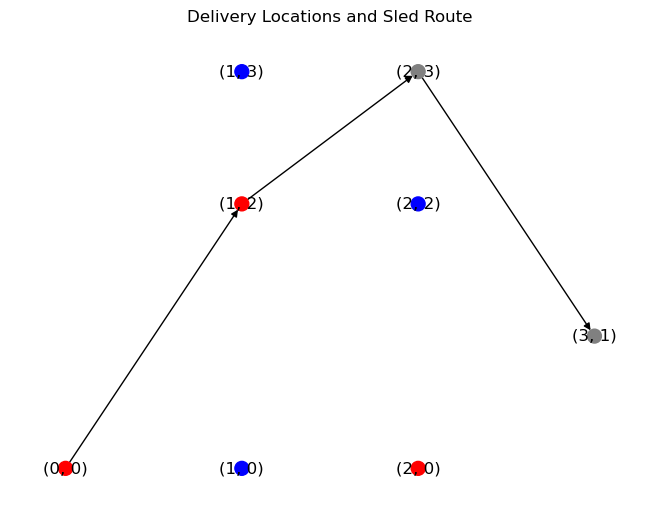

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

def read_data(file_path):
    # Read the general parameters line
    with open(file_path, 'r') as file:
        general_params = list(map(int, file.readline().strip().split()))

    # Read the rest of the file into a DataFrame
    df = pd.read_csv(file_path, sep=' ', skiprows=1, header=None)
    df.columns = ['Start_Horizontal', 'Start_Vertical', 'Finish_Horizontal', 'Finish_Vertical', 'Earliest_Start', 'Latest_Finish']

    return general_params, df

def plot_route(df, route):
    G = nx.DiGraph()

    # Add nodes for all points in the route with a default color
    for point in route:
        G.add_node(point, color='gray')

    # Add edges for the route
    for i in range(len(route) - 1):
        G.add_edge(route[i], route[i+1])

    # Update colors for start and finish locations
    for index, row in df.iterrows():
        G.add_node((row['Start_Horizontal'], row['Start_Vertical']), color='red')
        G.add_node((row['Finish_Horizontal'], row['Finish_Vertical']), color='blue')

    # Position for each node
    pos = {node: (node[0], node[1]) for node in G.nodes()}

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_size=100, node_color=[G.nodes[node]['color'] for node in G.nodes])
    plt.title("Delivery Locations and Sled Route")
    plt.show()

# Example usage
file_path = 'Datasets/1_Geldermalsen.txt'
general_params, df = read_data(file_path)
route = [(0, 0), (1, 2), (2, 3), (3, 1)]  # Example route
plot_route(df, route)


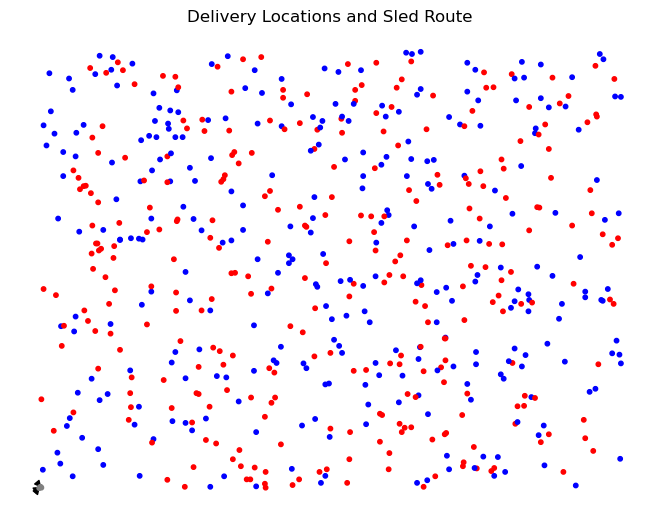

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

def read_data(file_path):
    # Read the general parameters line
    with open(file_path, 'r') as file:
        general_params = list(map(int, file.readline().strip().split()))

    # Read the rest of the file into a DataFrame
    df = pd.read_csv(file_path, sep=' ', skiprows=1, header=None)
    df.columns = ['Start_Horizontal', 'Start_Vertical', 'Finish_Horizontal', 'Finish_Vertical', 'Earliest_Start', 'Latest_Finish']

    return general_params, df

def plot_route(df, route):
    G = nx.DiGraph()

    # Add nodes for all points in the route with a default color
    for point in route:
        G.add_node(point, color='gray')

    # Add edges for the route
    for i in range(len(route) - 1):
        G.add_edge(route[i], route[i+1])

    # Update colors for start and finish locations
    for index, row in df.iterrows():
        G.add_node((row['Start_Horizontal'], row['Start_Vertical']), color='red')
        G.add_node((row['Finish_Horizontal'], row['Finish_Vertical']), color='blue')

    # Position for each node
    pos = {node: (node[0], node[1]) for node in G.nodes()}

    # Draw the graph
    nx.draw(G, pos, with_labels=False, node_size=10, node_color=[G.nodes[node]['color'] for node in G.nodes])
    plt.title("Delivery Locations and Sled Route")
    plt.show()

# Example usage
file_path = 'Datasets/2_Delft.txt'
general_params, df = read_data(file_path)
route = [(0, 0), (1, 2), (2, 3), (3, 1)]  # Example route
plot_route(df, route)


In [45]:
import pandas as pd

def calculate_distance(point1, point2):
    """Calculate the Manhattan distance between two points."""
    return abs(point1[0] - point2[0]) + abs(point1[1] - point2[1])

def nearest_neighbor_route(df):
    # Starting at the first delivery point
    current_point = (df.iloc[0]['Start_Horizontal'], df.iloc[0]['Start_Vertical'])
    unvisited = df.index.tolist()[1:]  # All points except the starting point
    route = [current_point]

    # Iterate until all points are visited
    while unvisited:
        nearest_point, nearest_idx = None, None
        min_distance = float('inf')

        # Find the nearest unvisited point
        for idx in unvisited:
            next_point = (df.loc[idx, 'Start_Horizontal'], df.loc[idx, 'Start_Vertical'])
            distance = calculate_distance(current_point, next_point)
            if distance < min_distance:
                min_distance = distance
                nearest_point = next_point
                nearest_idx = idx

        # Update the current point and mark as visited
        current_point = nearest_point
        route.append(current_point)
        unvisited.remove(nearest_idx)

    return route

# Example usage
# df = pd.DataFrame(...)  # Your DataFrame here
route = nearest_neighbor_route(df)
print("Route:", route)


Route: [(395, 43), (385, 37), (357, 20), (348, 7), (310, 10), (311, 1), (311, 37), (296, 47), (277, 50), (266, 66), (275, 87), (243, 102), (229, 110), (210, 150), (234, 186), (219, 215), (216, 217), (258, 224), (291, 207), (324, 207), (319, 195), (310, 163), (332, 100), (400, 136), (427, 128), (468, 106), (481, 80), (480, 43), (426, 66), (423, 12), (528, 3), (544, 27), (582, 50), (583, 59), (601, 45), (625, 46), (621, 39), (597, 94), (557, 123), (559, 126), (540, 111), (511, 139), (502, 138), (498, 128), (495, 147), (471, 167), (468, 170), (506, 215), (517, 208), (528, 267), (552, 276), (558, 292), (558, 342), (557, 342), (524, 323), (497, 303), (495, 283), (482, 285), (449, 270), (432, 268), (400, 309), (378, 301), (362, 356), (345, 370), (379, 411), (426, 438), (432, 467), (474, 470), (481, 487), (500, 484), (525, 464), (517, 426), (530, 416), (534, 379), (584, 384), (637, 404), (623, 425), (631, 440), (635, 475), (648, 494), (613, 505), (593, 508), (582, 461), (587, 566), (561, 555)

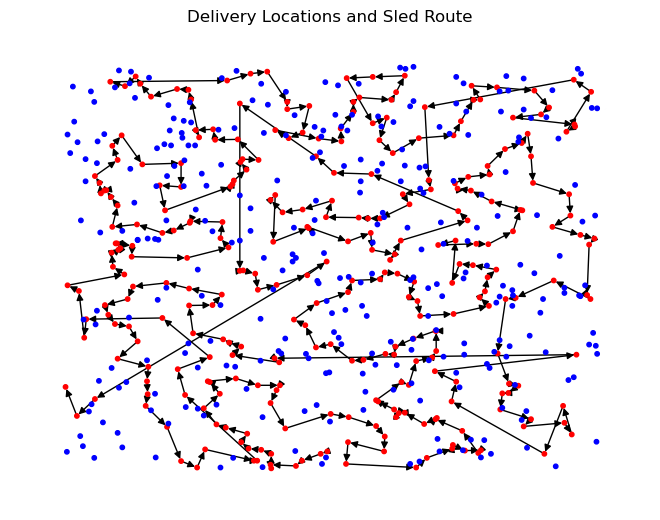

In [46]:
plot_route(df, route)

In [47]:
counter = 0
for route in routes:
    counter+=1
print(counter)

100


In [48]:
def create_submission_file(sledges_deliveries, file_name):
    with open(file_name, 'w') as file:
        for deliveries in sledges_deliveries:
            # Number of deliveries for this sledge
            M = len(deliveries)
            # Delivery numbers
            delivery_numbers = ' '.join(map(str, deliveries))
            # Write to file
            file.write(f"{M} {delivery_numbers}\n")

# Example usage
sledges_deliveries = [
    [0, 1, 3],    # Deliveries assigned to the first sledge
    [2, 4, 5, 6], # Deliveries assigned to the second sledge
    [7, 8]        # Deliveries assigned to the third sledge
]

create_submission_file(sledges_deliveries, 'santa_submission.txt')

In [49]:
import pandas as pd
import numpy as np


# Read the file
file_path = 'Datasets/2_Delft.txt'

# Read the general parameters line
with open(file_path, 'r') as file:
    general_params = file.readline()
    general_paramslist = general_params.split(" ")


horizontal_streets = int(general_paramslist[0])
vertical_street = int(general_paramslist[1])
no_sledges = int(general_paramslist[2])
no_presents = int(general_paramslist[3])
bonus_per_ride = int(general_paramslist[4])
no_steps = int(general_paramslist[5]) 



class Present:
    def __init__(self, a, b, x, y, s, f):
        self.starthor = a
        self.startver = b
        self.finhor = x
        self.finver = y
        self.devtime = s
        self.fintime = f

class Sledge:
    def __init__(self):
        self.no_pres_deliv = 0
        self.no_steps_taken = 0
        self.pres_deliv = []
        self.current_hor = 0
        self.current_ver = 0

    def add_present(self, p):
        self.no_pres_deliv += 1
        self.no_steps_taken += (abs(self.current_hor - p.starthor) + abs(self.current_ver - p.startver) + 
                                abs(p.starthor - p.finhor) + abs(p.startver - p.finver))
        self.pres_deliv.append(p)
        self.current_hor, self.current_ver = p.finhor, p.finver

# def nearest_neighbor_route(df, sledges):
#     unvisited = [Present(row['Start_Horizontal'], row['Start_Vertical'], row['Finish_Horizontal'], 
#                          row['Finish_Vertical'], row['Earliest_Start'], row['Latest_Finish']) for index, row in df.iterrows()]

#     for sledge in sledges:
#         while unvisited:
#             nearest_present, nearest_idx = None, None
#             min_distance = float('inf')

#             # Find the nearest unvisited present
#             for idx, present in enumerate(unvisited):
#                 distance = abs(sledge.current_hor - present.starthor) + abs(sledge.current_ver - present.startver)
#                 if distance < min_distance:
#                     min_distance = distance
#                     nearest_present = present
#                     nearest_idx = idx

#             if nearest_present:
#                 sledge.add_present(nearest_present)
#                 del unvisited[nearest_idx]
# def nearest_neighbor_route(df, sledges):
#     unvisited = [Present(row['Start_Horizontal'], row['Start_Vertical'], row['Finish_Horizontal'], 
#                          row['Finish_Vertical'], row['Earliest_Start'], row['Latest_Finish']) for index, row in df.iterrows()]

#     for sledge in sledges:
#         while unvisited:
#             nearest_present, nearest_idx = None, None
#             min_distance = float('inf')

#             # Find the nearest unvisited present
#             for idx, present in enumerate(unvisited):
#                 distance = abs(sledge.current_hor - present.starthor) + abs(sledge.current_ver - present.startver)
#                 if distance < min_distance:
#                     min_distance = distance
#                     nearest_present = present
#                     nearest_idx = idx

#             if nearest_present:
#                 # Check if the present can be delivered within its time constraints
#                 if sledge.no_steps_taken + min_distance + abs(nearest_present.starthor - nearest_present.finhor) + abs(nearest_present.startver - nearest_present.finver) <= no_steps and \
#                    sledge.no_pres_deliv < no_presents and \
#                    sledge.no_pres_deliv < no_sledges and \
#                    nearest_present.devtime >= sledge.no_steps_taken and \
#                    nearest_present.fintime >= sledge.no_steps_taken + min_distance + abs(nearest_present.starthor - nearest_present.finhor) + abs(nearest_present.startver - nearest_present.finver):
#                     sledge.add_present(nearest_present)
#                     del unvisited[nearest_idx]
#                 else:
#                     # Present doesn't meet constraints, move to the next present
#                     nearest_present = None

#             if nearest_present is None:
#                 # If no present was selected, break the loop for this sledge
#                 break
        
bonuspoints=0

def nearest_neighbor_route(df, sledges, maxsteps, bonus):
    unvisited = [Present(row['Start_Horizontal'], row['Start_Vertical'], row['Finish_Horizontal'], 
                         row['Finish_Vertical'], row['Earliest_Start'], row['Latest_Finish']) for index, row in df.iterrows()]
    
    for sledge in sledges:
        while unvisited:
            nearest_present, nearest_idx = None, None
            min_distance = float('inf')

            # Find the nearest unvisited present
            for idx, present in enumerate(unvisited):
                distance = abs(sledge.current_hor - present.starthor) + abs(sledge.current_ver - present.startver)
                if distance < min_distance:
                    min_distance = distance
                    nearest_present = present
                    nearest_idx = idx

            if nearest_present:
                # Calculate the time to reach the present's starting point
                time_to_start = sledge.no_steps_taken + min_distance
                if time_to_start < nearest_present.devtime:
                    # If the sledge arrives before devtime, wait until devtime
                    sledge.no_steps_taken += nearest_present.devtime - time_to_start

                # Check if the present can be picked up at devtime or after devtime
                if sledge.no_steps_taken >= nearest_present.devtime and \
                   sledge.no_pres_deliv + 1 <= no_presents and \
                   sledge.no_pres_deliv + 1 <= no_sledges and \
                   sledge.no_steps_taken + min_distance + abs(nearest_present.starthor - nearest_present.finhor) + abs(nearest_present.startver - nearest_present.finver) <= no_steps and \
                   nearest_present.fintime >= sledge.no_steps_taken + min_distance + abs(nearest_present.starthor - nearest_present.finhor) + abs(nearest_present.startver - nearest_present.finver):
                    # Calculate points for deliveries and bonus points for picking up at devtime
                    delivery_points = 20 if sledge.no_steps_taken == nearest_present.devtime else 10
                    bonus_points = 5 if sledge.no_steps_taken == nearest_present.devtime else 0

                    # Calculate total score without affecting steps
                    total_score = bonus_points + delivery_points

                    # Update sledge info
                    sledge.add_present(nearest_present)
                    del unvisited[nearest_idx]

                    # Update bonus points globally
                    bonus += total_score

                    # Print the scoring factors for debug/analysis
                    print(f"Bonus Points: {bonus_points}, Delivery Points: {delivery_points}, Total Score: {total_score}")

                else:
                    # Present doesn't meet conditions, move to the next present
                    nearest_present = None

            if nearest_present is None:
                # If no present was selected, break the loop for this sledge
                break

    return bonus  # Return the total bonus points computed separately
# Example usage
# Read the rest of the file into a DataFrame
df = pd.read_csv(file_path, sep=' ', skiprows=0, header=None)
df.columns = ['Start_Horizontal', 'Start_Vertical', 'Finish_Horizontal', 'Finish_Vertical', 'Earliest_Start', 'Latest_Finish']



# Create sledges
sledges = [Sledge() for _ in range(no_sledges)]

# Run the nearest neighbor algorithm
nearest_neighbor_route(df, sledges, no_steps, bonus_per_ride)

# Print the routes for each sledge
for i, sledge in enumerate(sledges):
    print(f"Sledge {i+1}:")
    for present in sledge.pres_deliv:
        print(f"  Deliver from ({present.starthor}, {present.startver}) to ({present.finhor}, {present.finver})")


Sledge 1:
Sledge 2:
Sledge 3:
Sledge 4:
Sledge 5:
Sledge 6:
Sledge 7:
Sledge 8:
Sledge 9:
Sledge 10:
Sledge 11:
Sledge 12:
Sledge 13:
Sledge 14:
Sledge 15:
Sledge 16:
Sledge 17:
Sledge 18:
Sledge 19:
Sledge 20:
Sledge 21:
Sledge 22:
Sledge 23:
Sledge 24:
Sledge 25:
Sledge 26:
Sledge 27:
Sledge 28:
Sledge 29:
Sledge 30:
Sledge 31:
Sledge 32:
Sledge 33:
Sledge 34:
Sledge 35:
Sledge 36:
Sledge 37:
Sledge 38:
Sledge 39:
Sledge 40:
Sledge 41:
Sledge 42:
Sledge 43:
Sledge 44:
Sledge 45:
Sledge 46:
Sledge 47:
Sledge 48:
Sledge 49:
Sledge 50:
Sledge 51:
Sledge 52:
Sledge 53:
Sledge 54:
Sledge 55:
Sledge 56:
Sledge 57:
Sledge 58:
Sledge 59:
Sledge 60:
Sledge 61:
Sledge 62:
Sledge 63:
Sledge 64:
Sledge 65:
Sledge 66:
Sledge 67:
Sledge 68:
Sledge 69:
Sledge 70:
Sledge 71:
Sledge 72:
Sledge 73:
Sledge 74:
Sledge 75:
Sledge 76:
Sledge 77:
Sledge 78:
Sledge 79:
Sledge 80:
Sledge 81:
Sledge 82:
Sledge 83:
Sledge 84:
Sledge 85:
Sledge 86:
Sledge 87:
Sledge 88:
Sledge 89:
Sledge 90:
Sledge 91:
Sledge 9

In [50]:
import pandas as pd

def process_file(file_path):
    # Read the general parameters line
    with open(file_path, 'r') as file:
        general_params = list(map(int, file.readline().strip().split()))

    # Extract general parameters
    H, V, no_sledges, P, B, T = general_params

    # Read the rest of the file into a DataFrame
    df = pd.read_csv(file_path, sep=' ', skiprows=1, header=None)
    df.columns = ['Start_Horizontal', 'Start_Vertical', 'Finish_Horizontal', 'Finish_Vertical', 'Earliest_Start', 'Latest_Finish']

    # Create sledges
    sledges = [Sledge() for _ in range(no_sledges)]

    # Run the nearest neighbor algorithm
    nearest_neighbor_route(df, sledges,no_steps,bonus_per_ride)

    # Print the routes for each sledge
    for i, sledge in enumerate(sledges):
        print(f"Sledge {i+1} in {file_path}:")
        for present in sledge.pres_deliv:
            print(f"  Deliver from ({present.starthor}, {present.startver}) to ({present.finhor}, {present.finver})")
    print("\n")

# List of file paths
file_paths = ['Datasets/5_Amsterdam.txt']

# Process each file
for file_path in file_paths:
    process_file(file_path)


Sledge 1 in Datasets/5_Amsterdam.txt:
Sledge 2 in Datasets/5_Amsterdam.txt:
Sledge 3 in Datasets/5_Amsterdam.txt:
Sledge 4 in Datasets/5_Amsterdam.txt:
Sledge 5 in Datasets/5_Amsterdam.txt:
Sledge 6 in Datasets/5_Amsterdam.txt:
Sledge 7 in Datasets/5_Amsterdam.txt:
Sledge 8 in Datasets/5_Amsterdam.txt:
Sledge 9 in Datasets/5_Amsterdam.txt:
Sledge 10 in Datasets/5_Amsterdam.txt:
Sledge 11 in Datasets/5_Amsterdam.txt:
Sledge 12 in Datasets/5_Amsterdam.txt:
Sledge 13 in Datasets/5_Amsterdam.txt:
Sledge 14 in Datasets/5_Amsterdam.txt:
Sledge 15 in Datasets/5_Amsterdam.txt:
Sledge 16 in Datasets/5_Amsterdam.txt:
Sledge 17 in Datasets/5_Amsterdam.txt:
Sledge 18 in Datasets/5_Amsterdam.txt:
Sledge 19 in Datasets/5_Amsterdam.txt:
Sledge 20 in Datasets/5_Amsterdam.txt:
Sledge 21 in Datasets/5_Amsterdam.txt:
Sledge 22 in Datasets/5_Amsterdam.txt:
Sledge 23 in Datasets/5_Amsterdam.txt:
Sledge 24 in Datasets/5_Amsterdam.txt:
Sledge 25 in Datasets/5_Amsterdam.txt:
Sledge 26 in Datasets/5_Amsterdam.

In [51]:
%pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


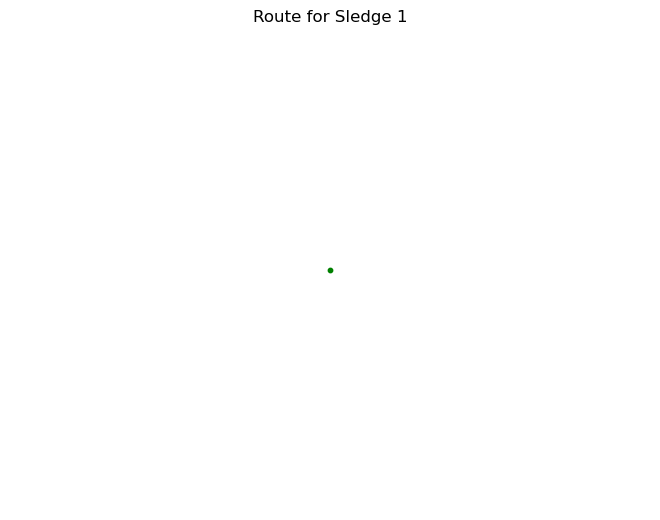

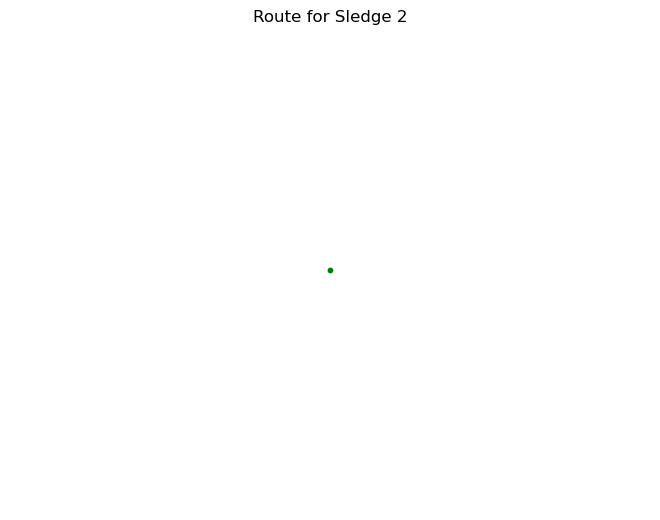

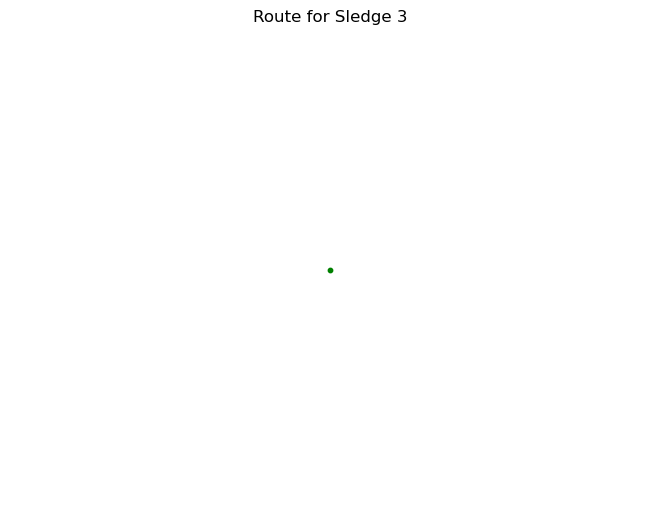

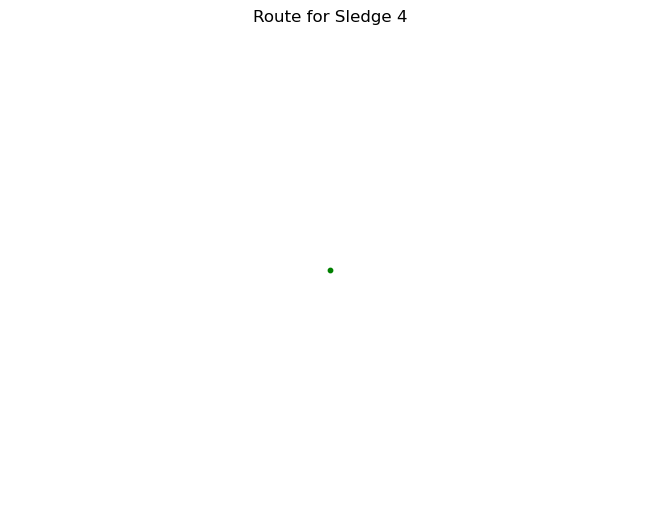

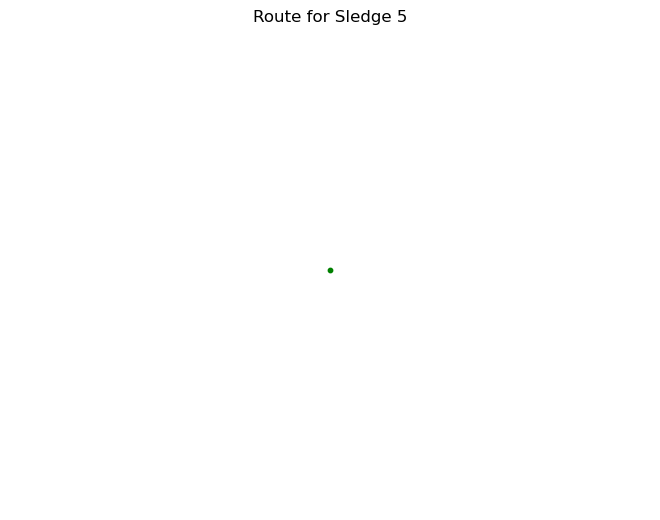

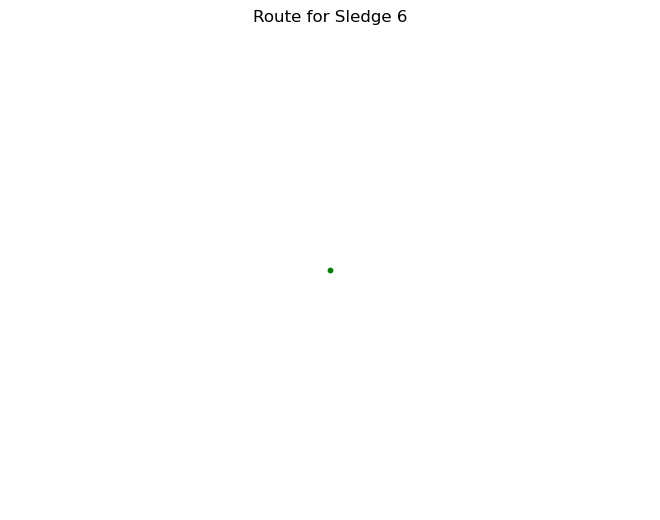

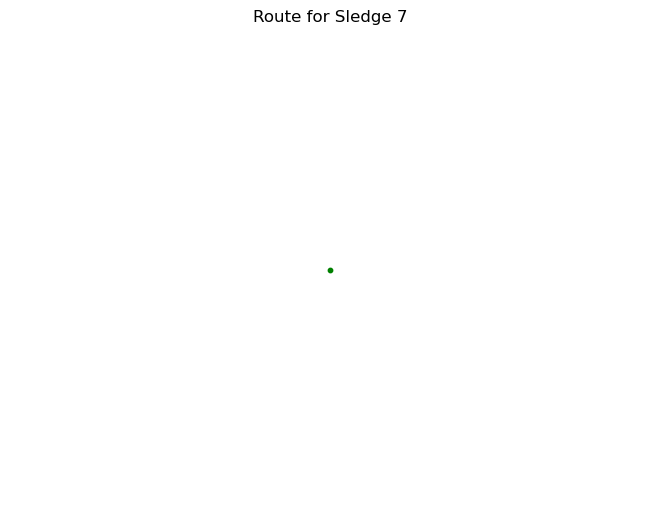

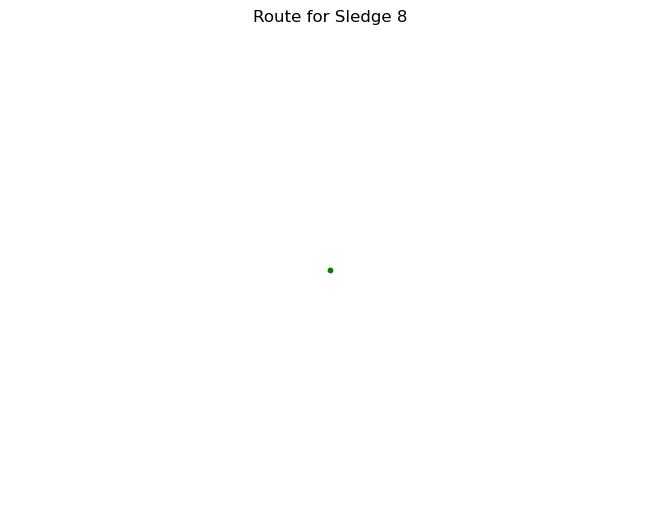

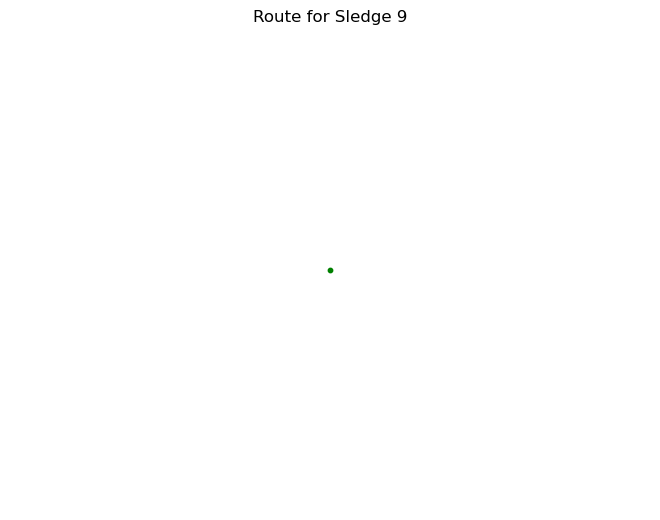

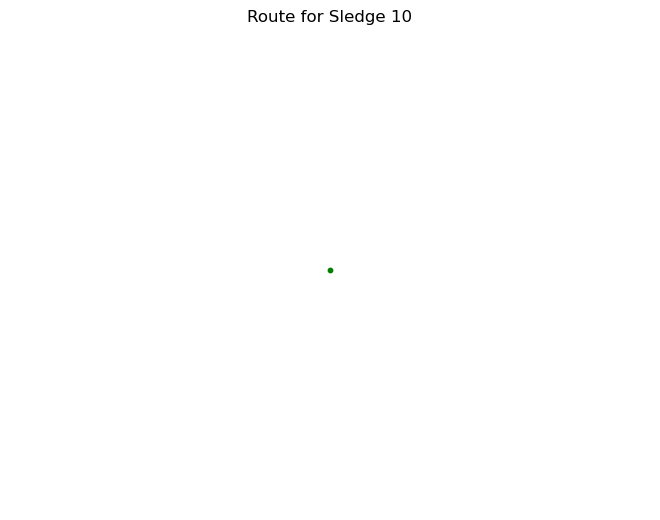

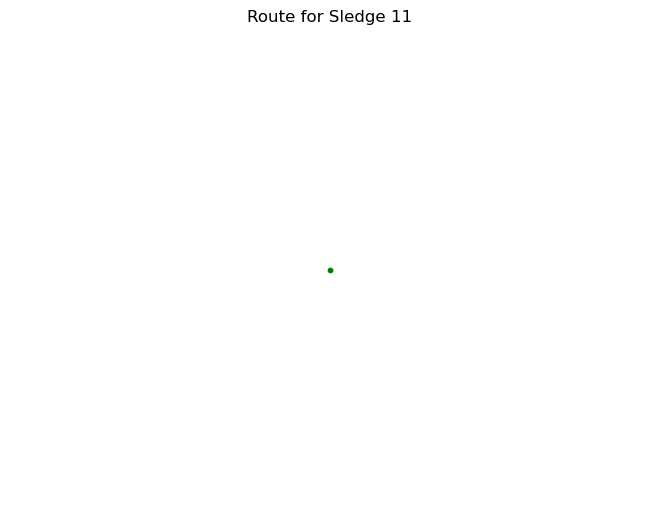

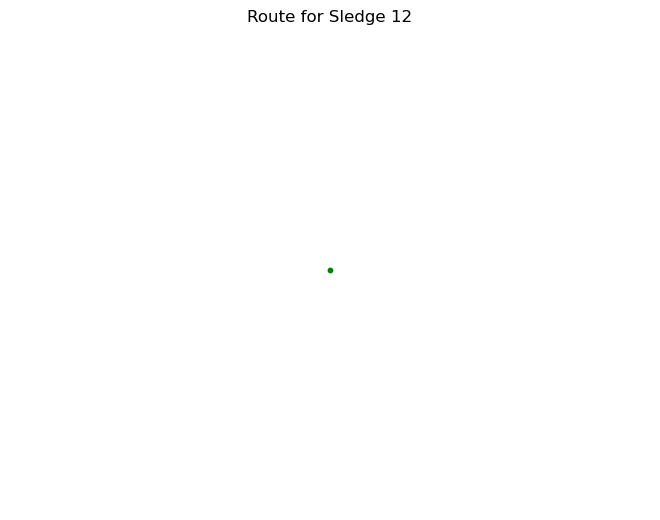

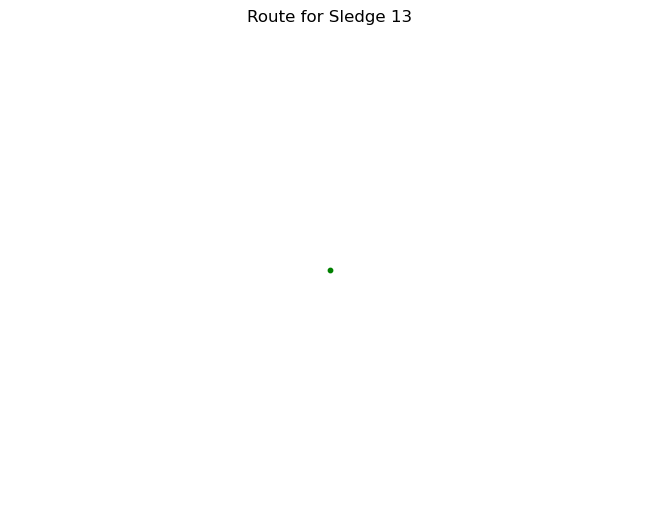

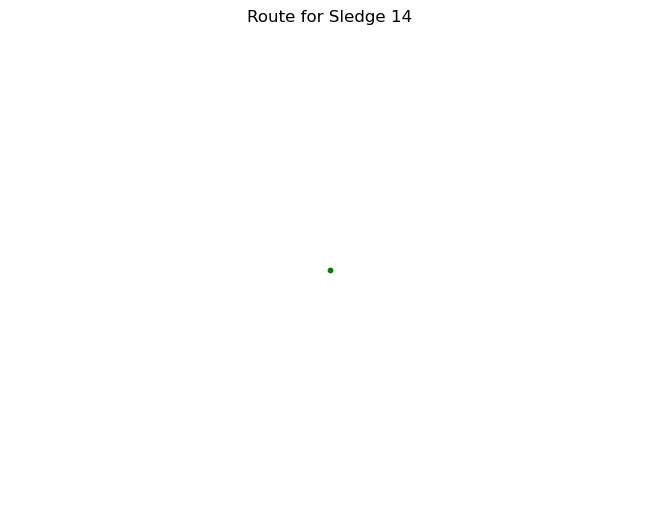

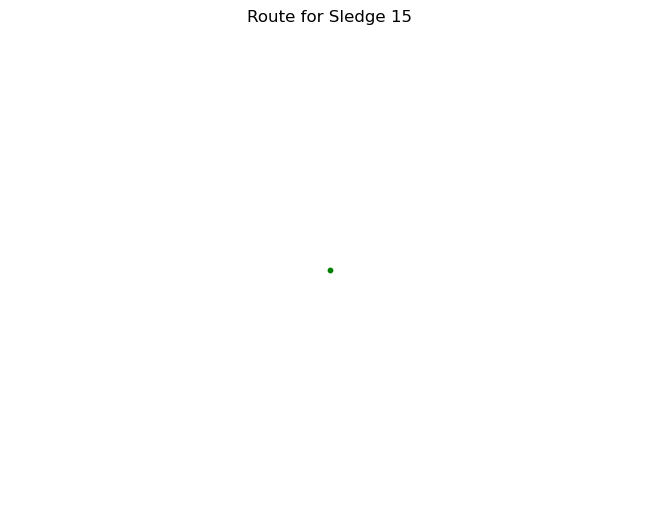

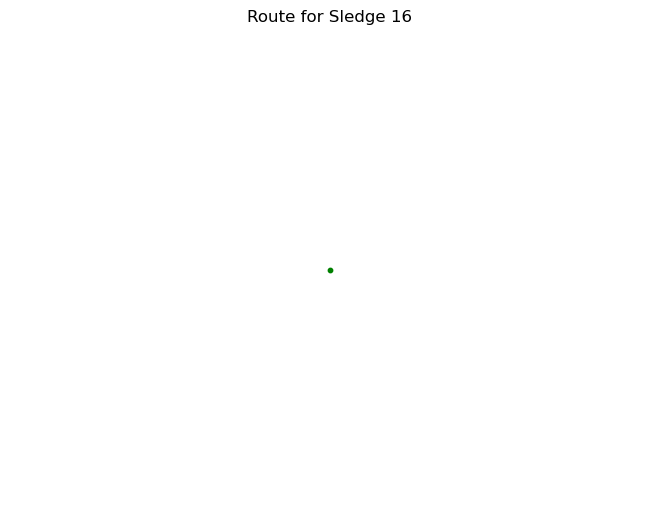

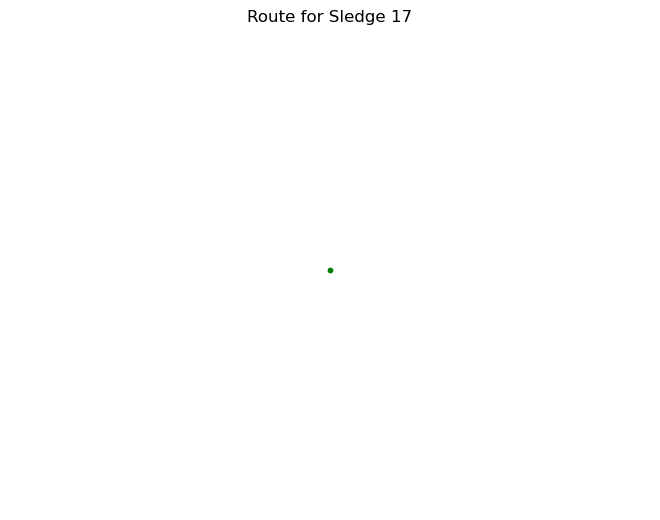

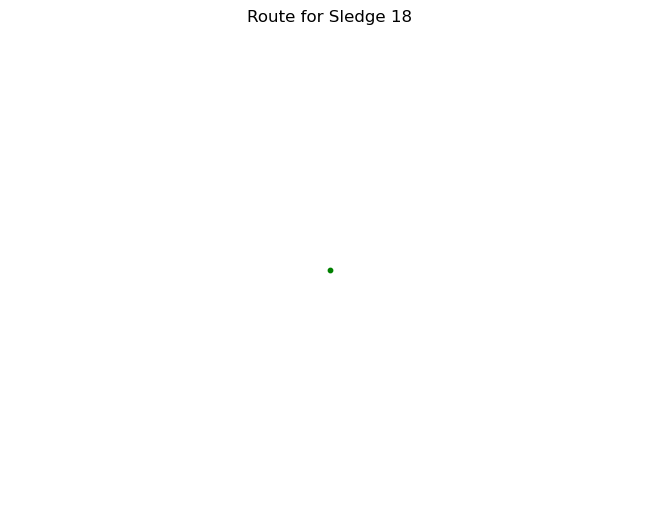

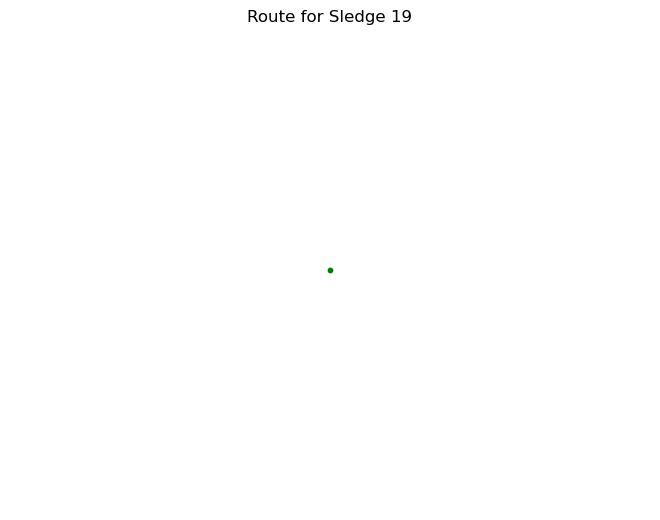

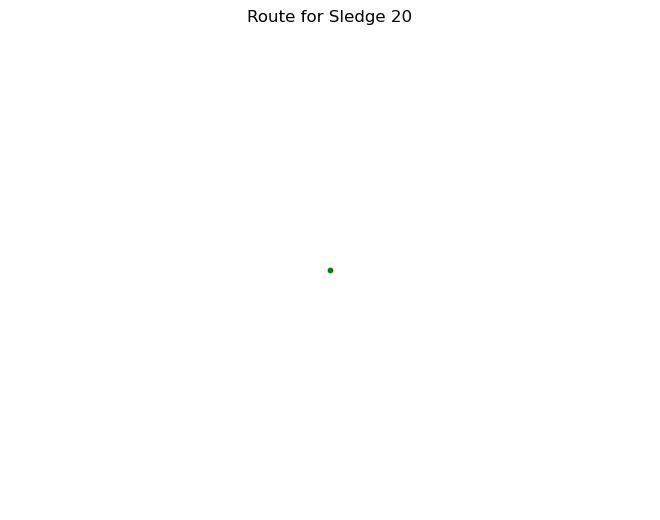

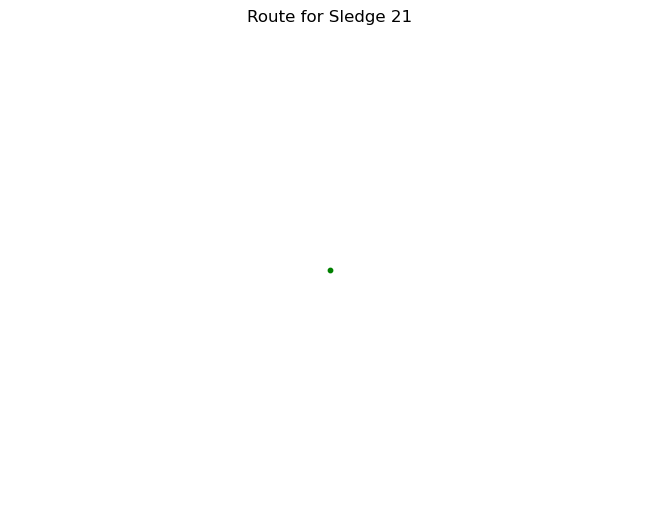

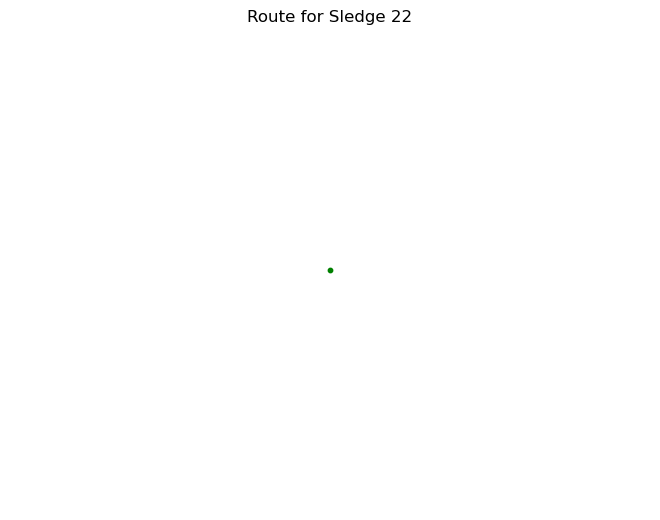

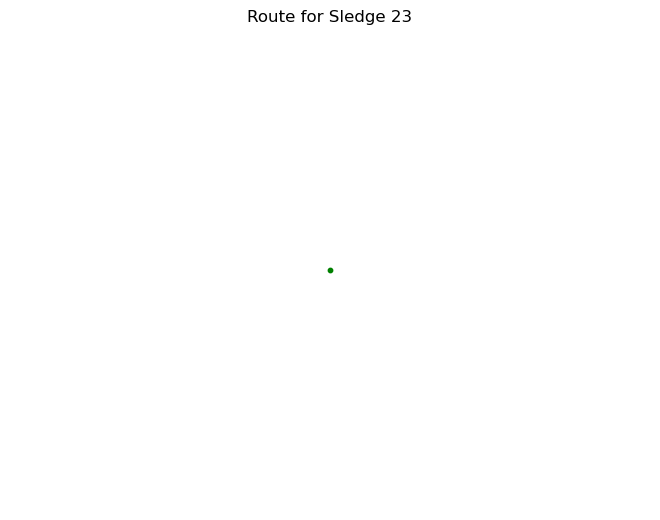

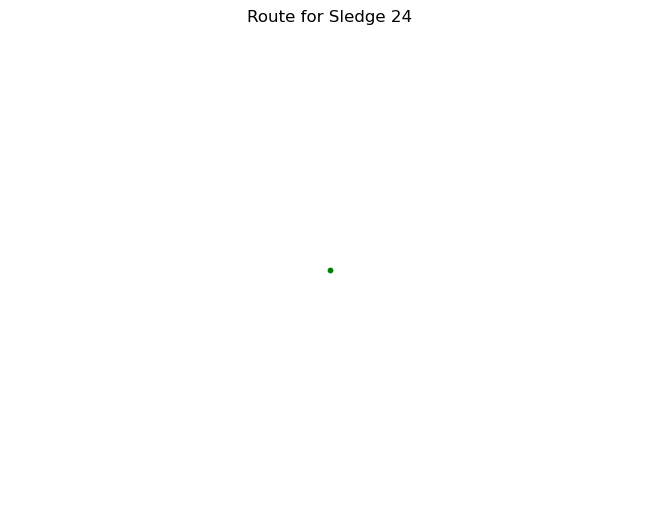

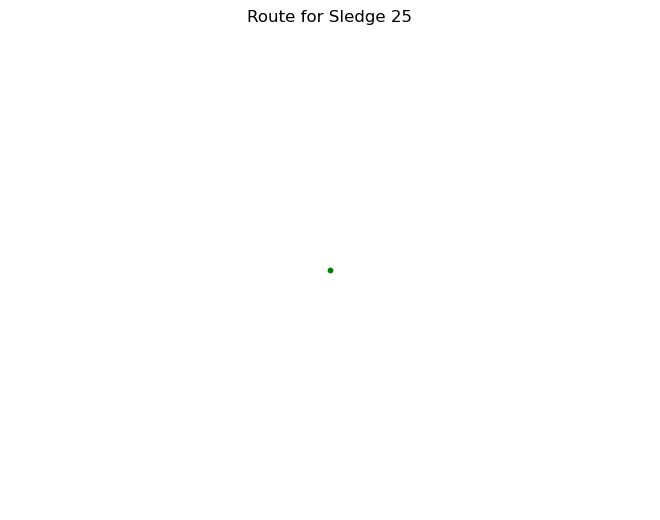

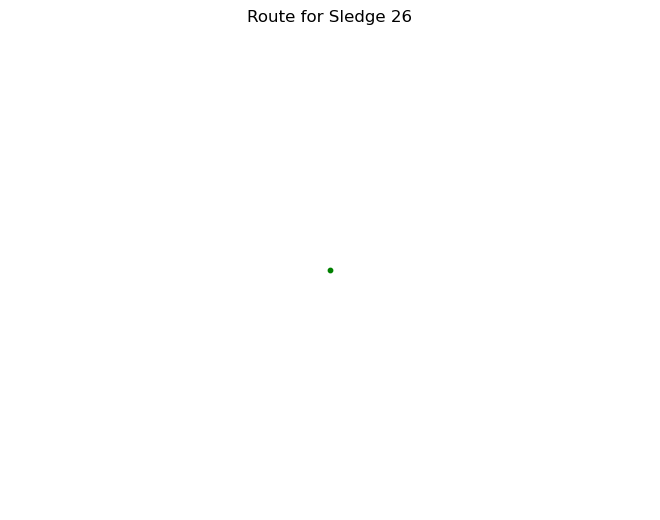

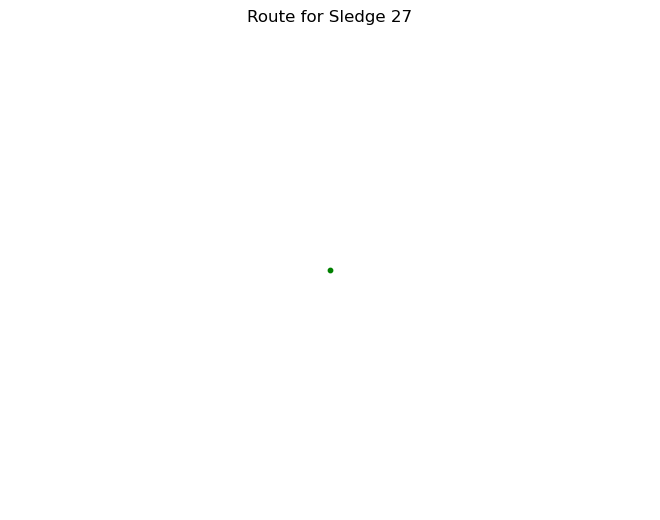

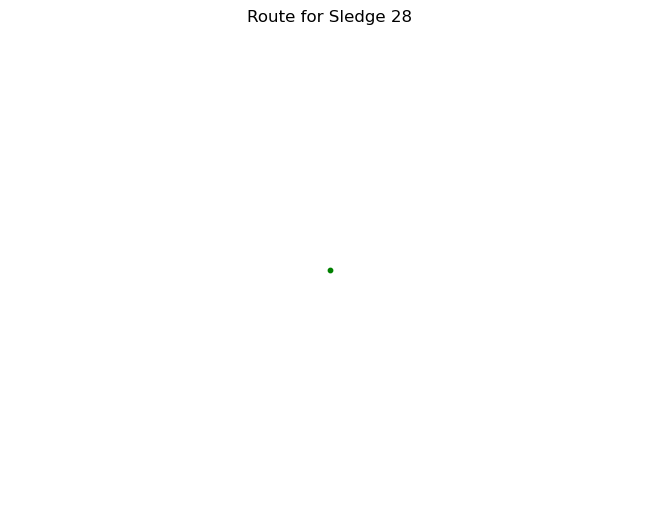

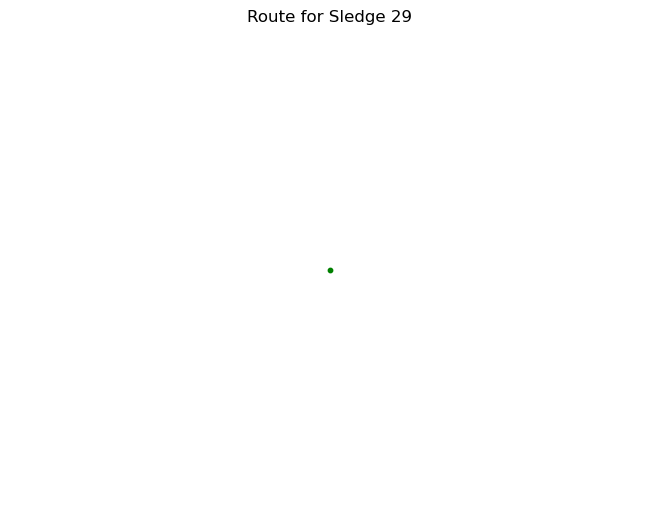

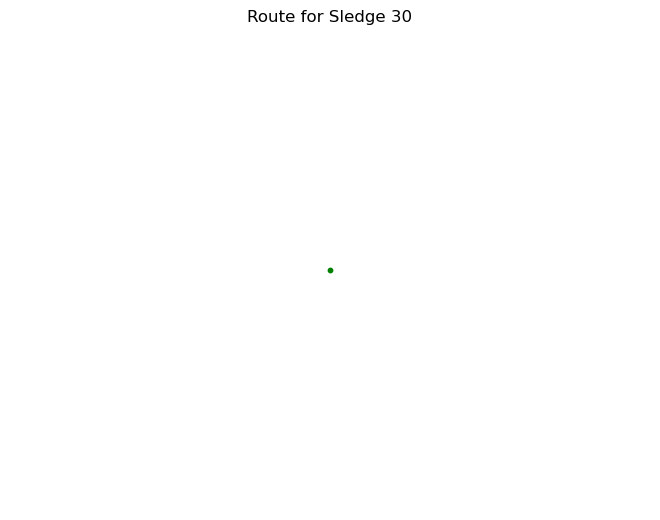

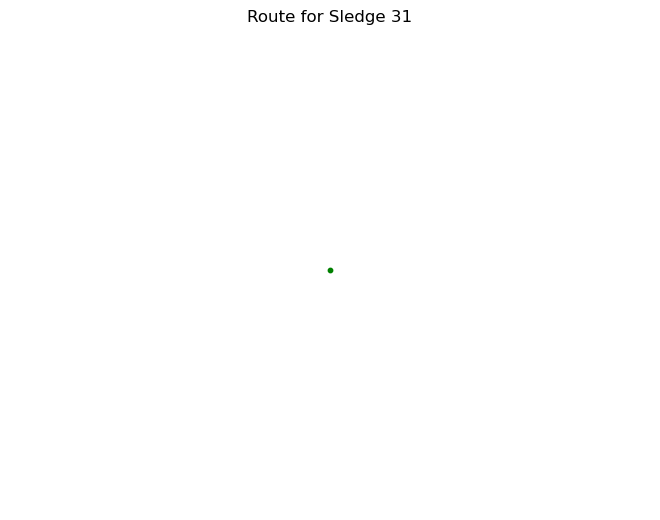

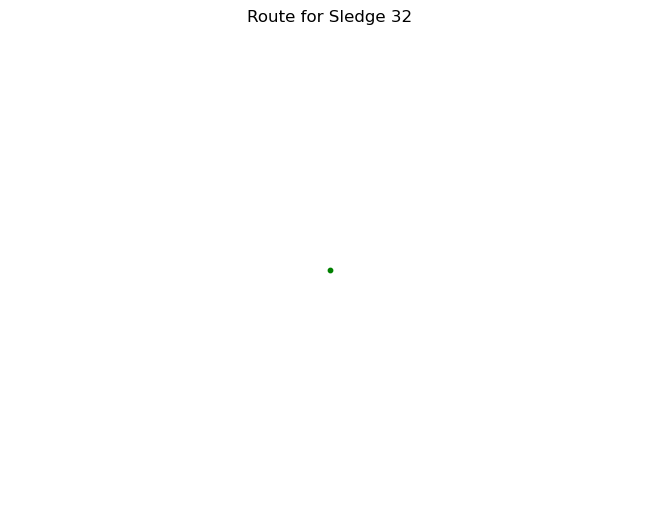

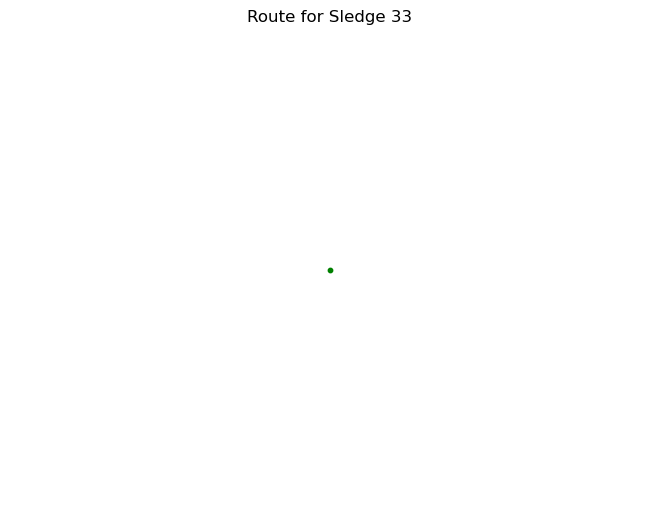

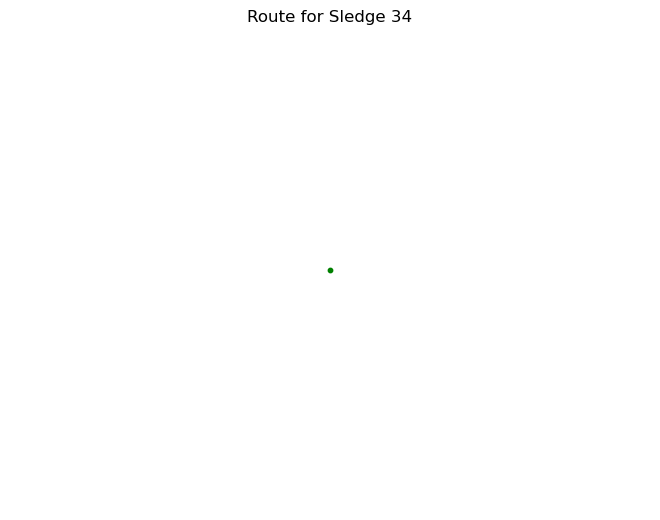

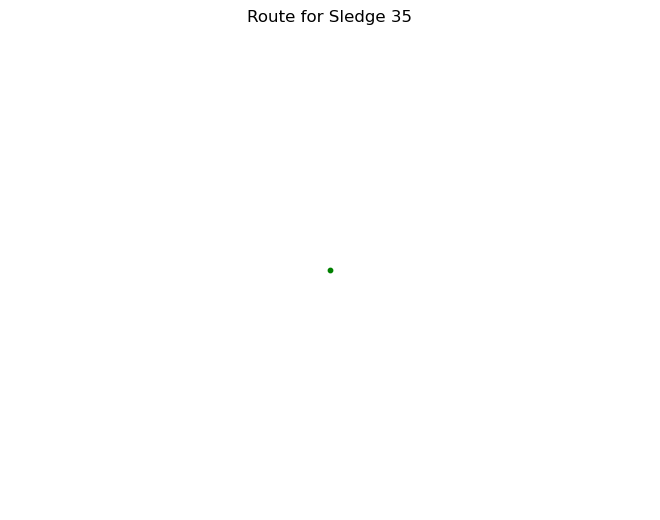

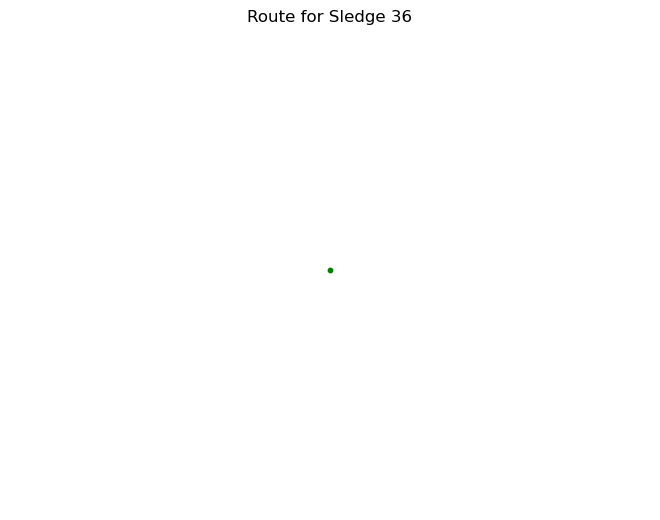

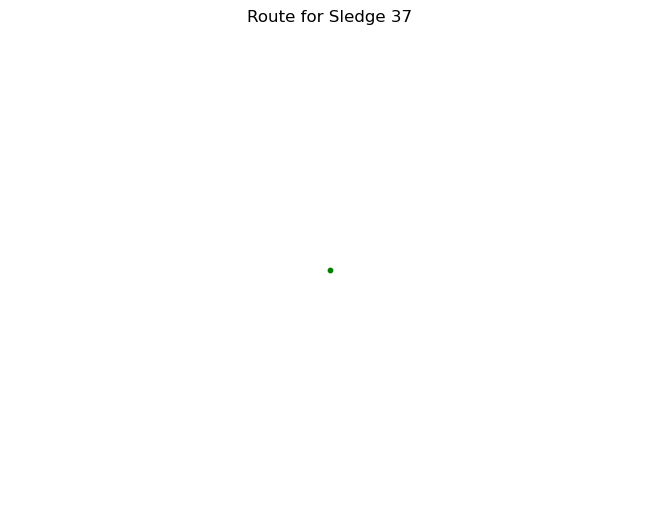

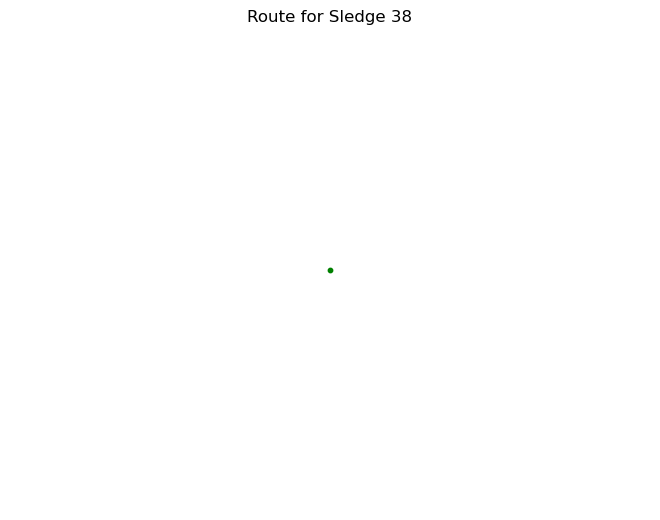

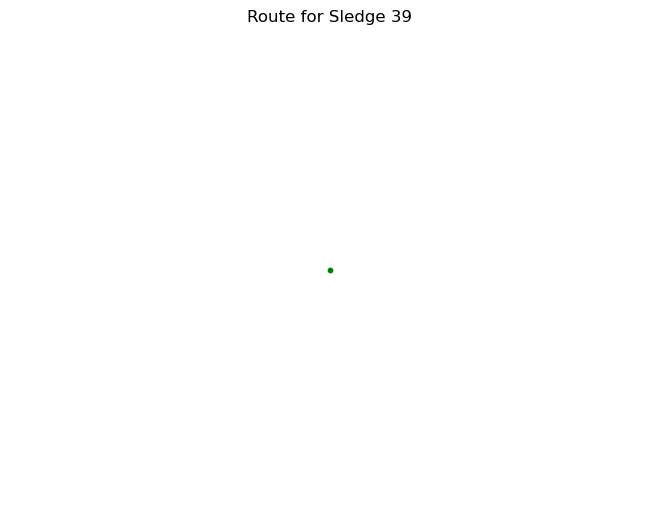

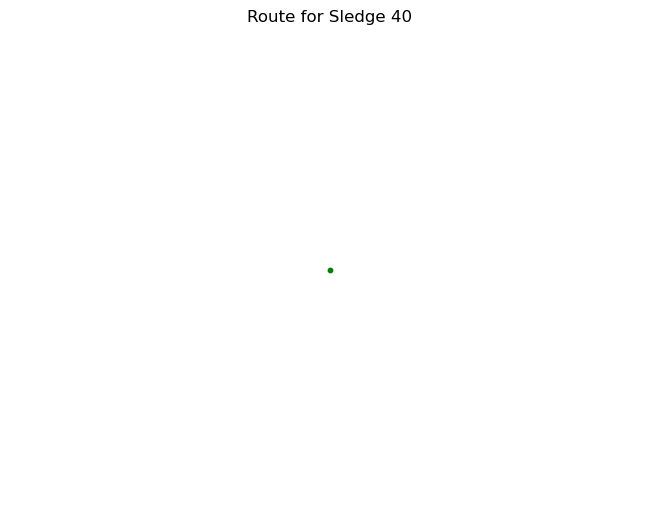

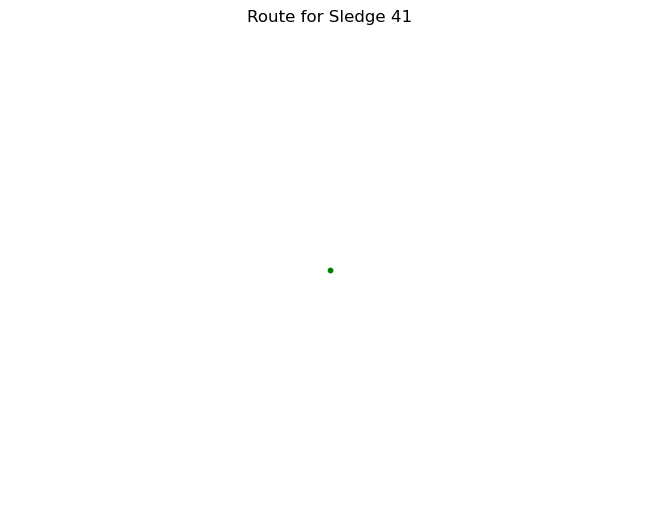

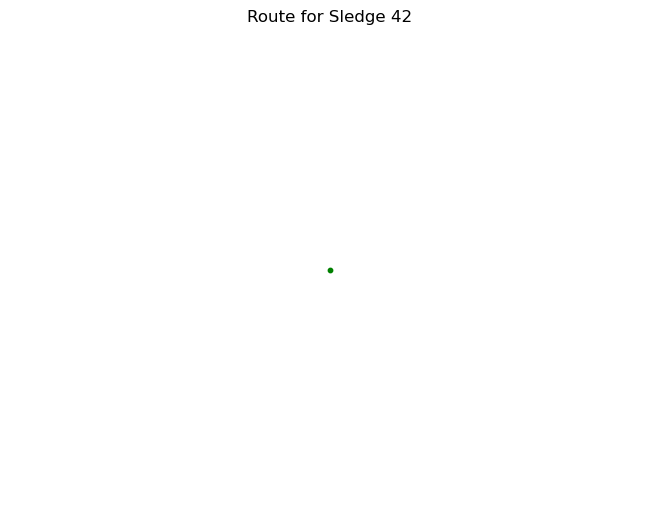

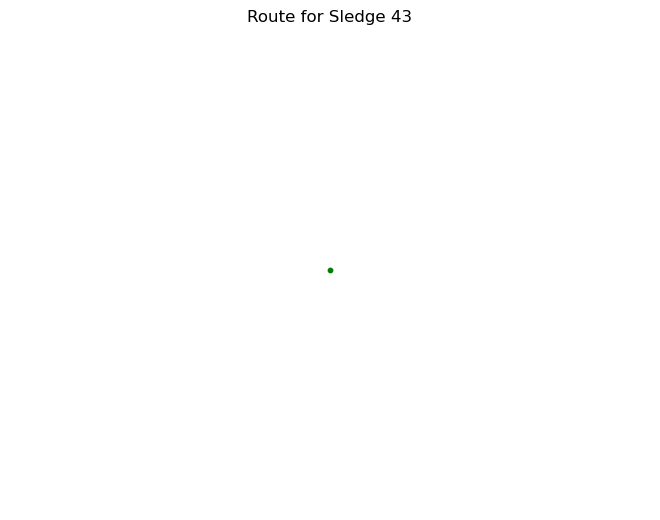

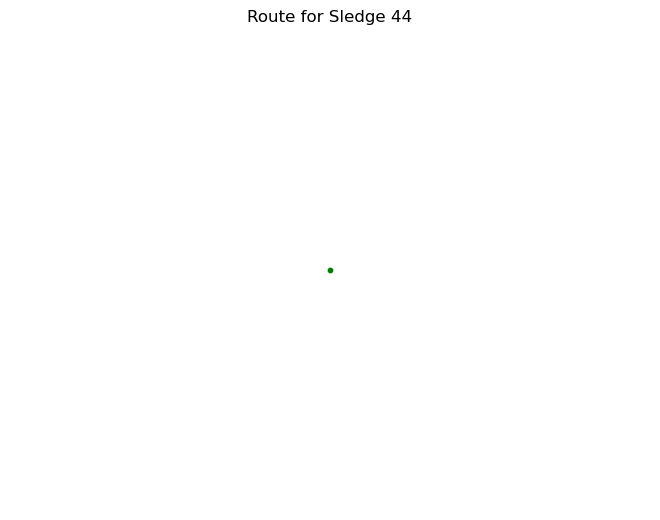

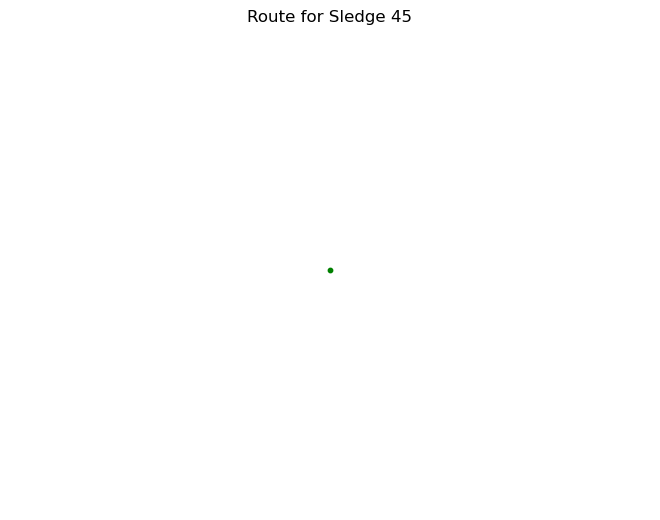

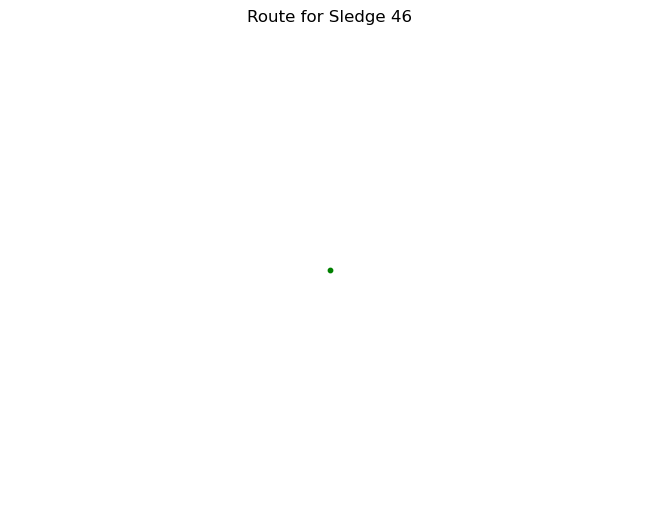

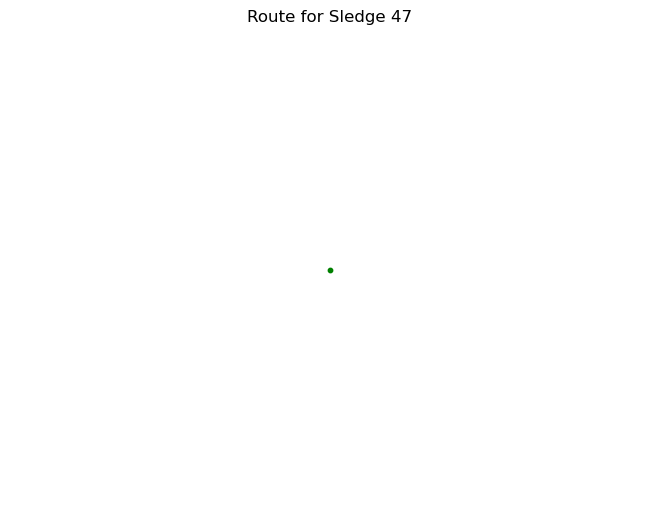

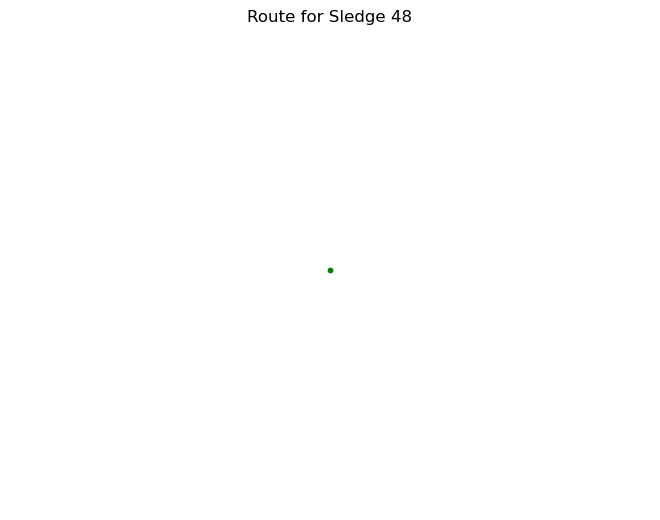

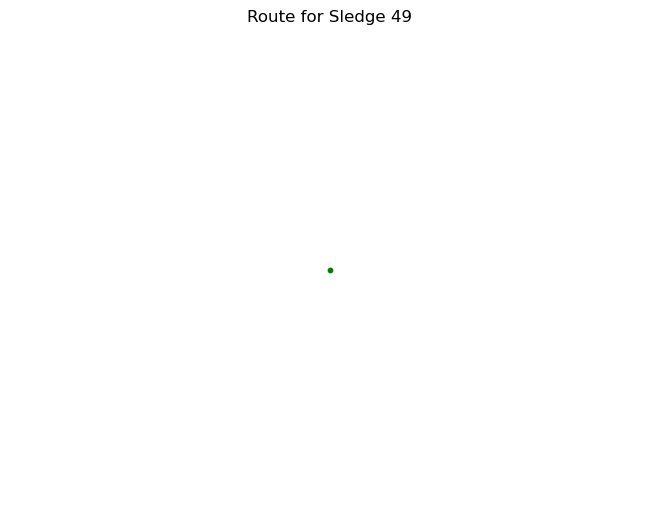

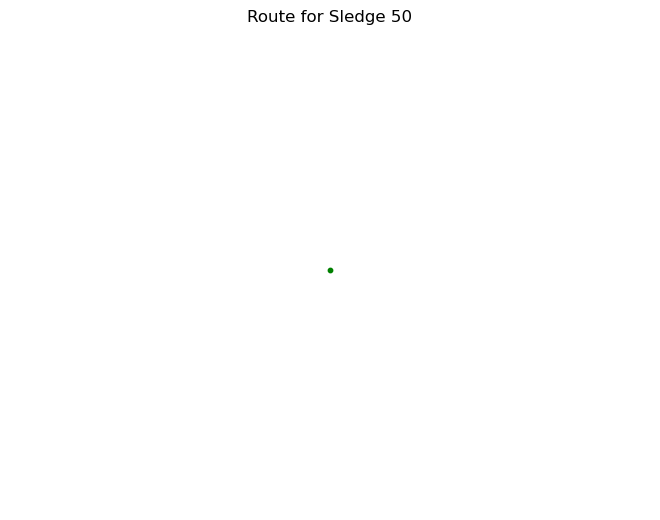

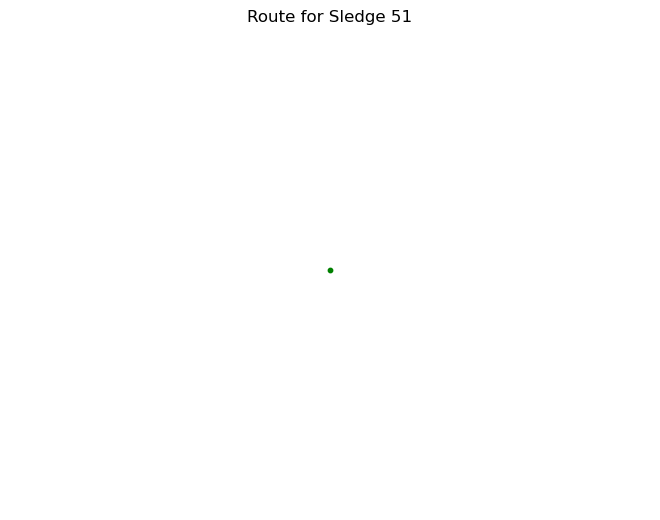

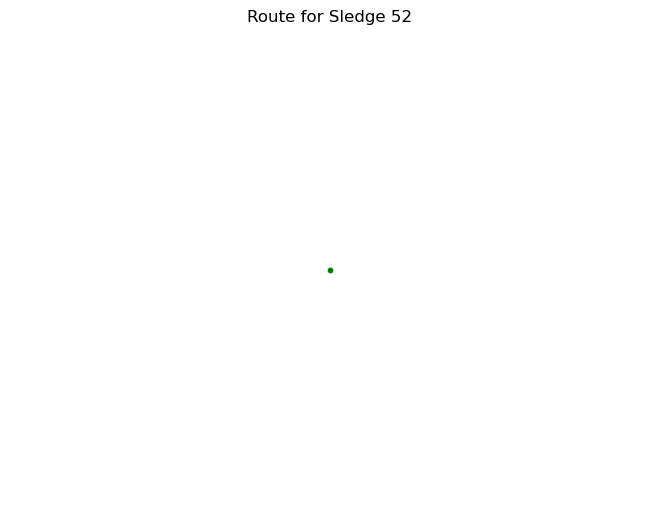

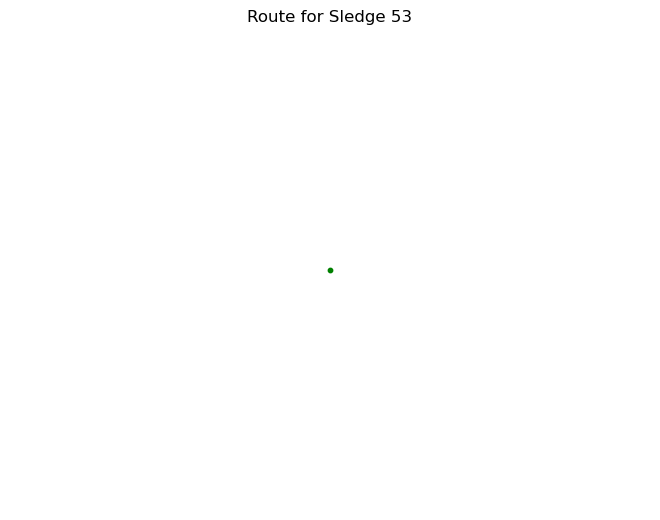

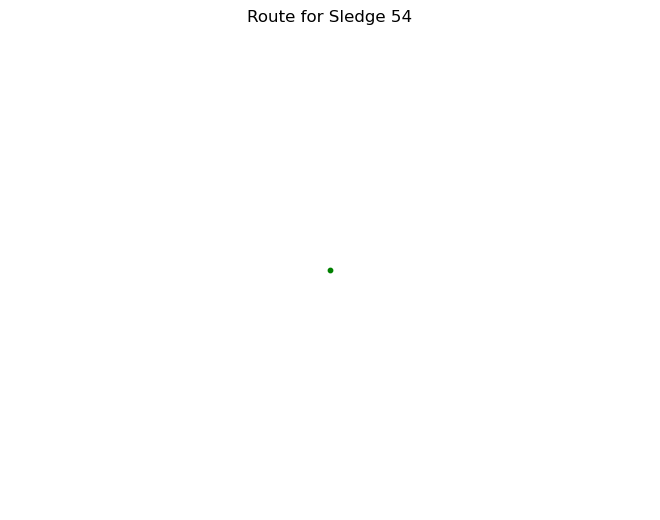

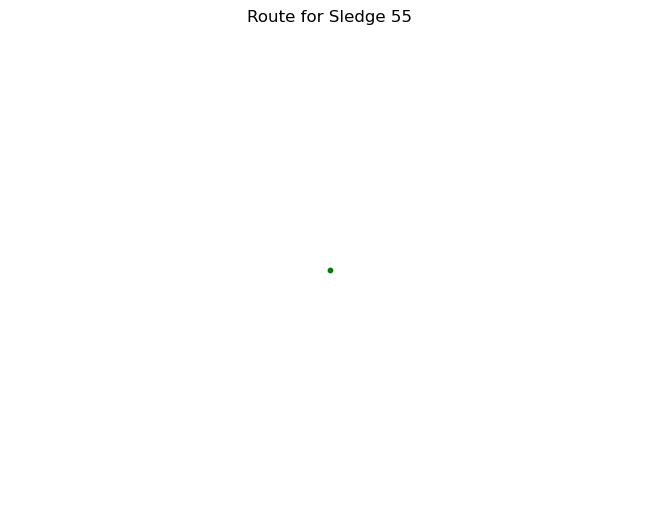

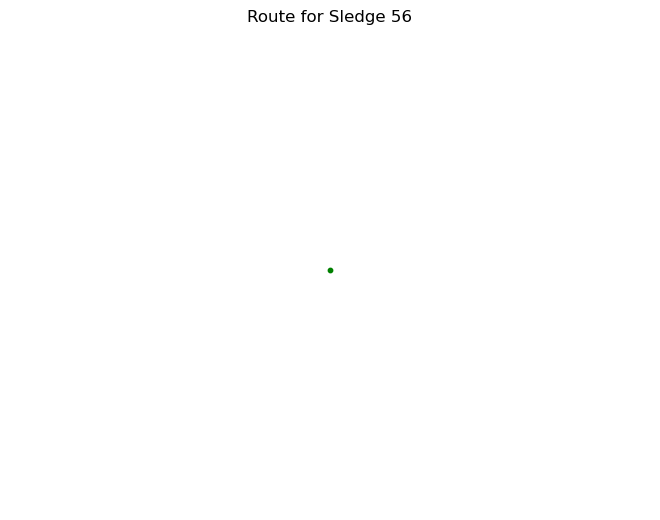

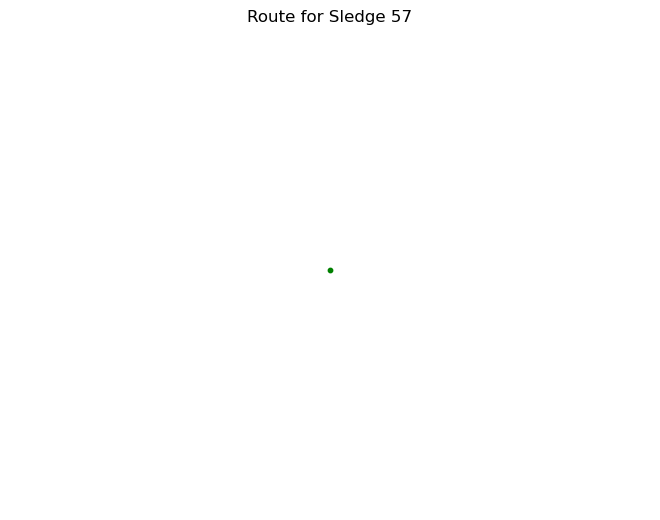

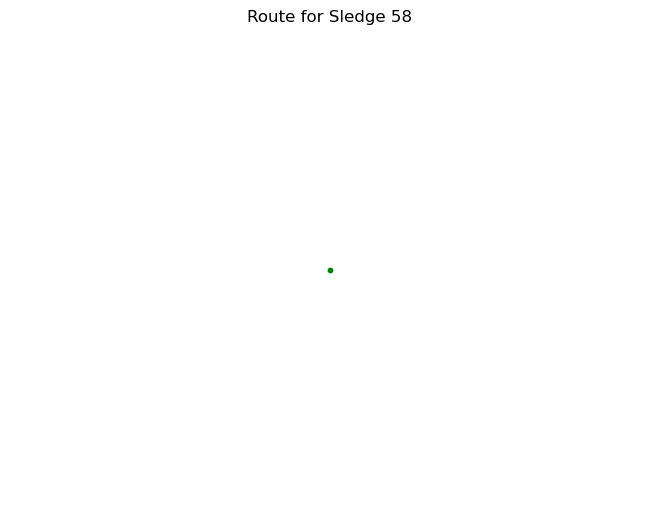

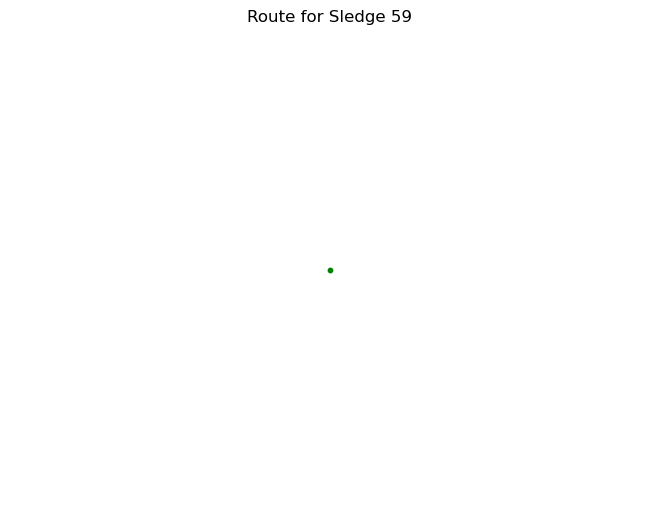

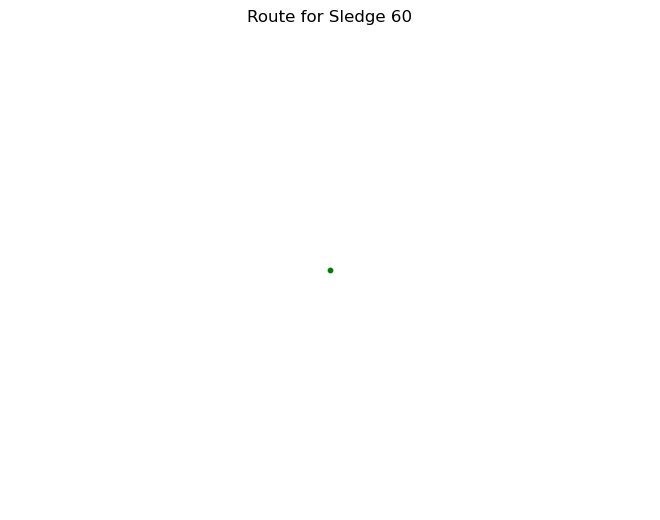

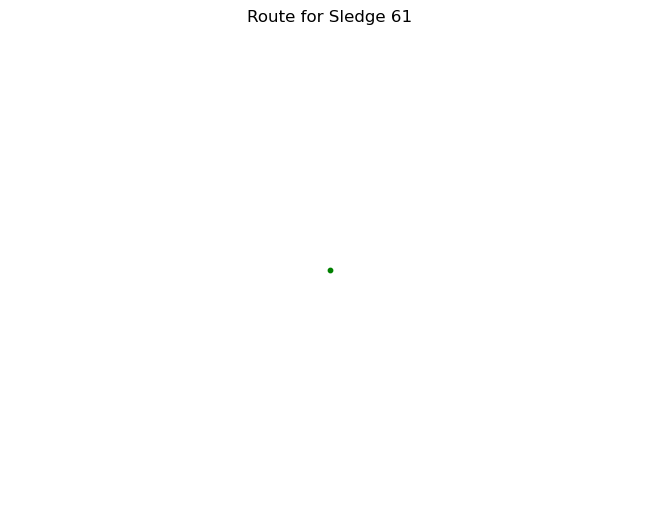

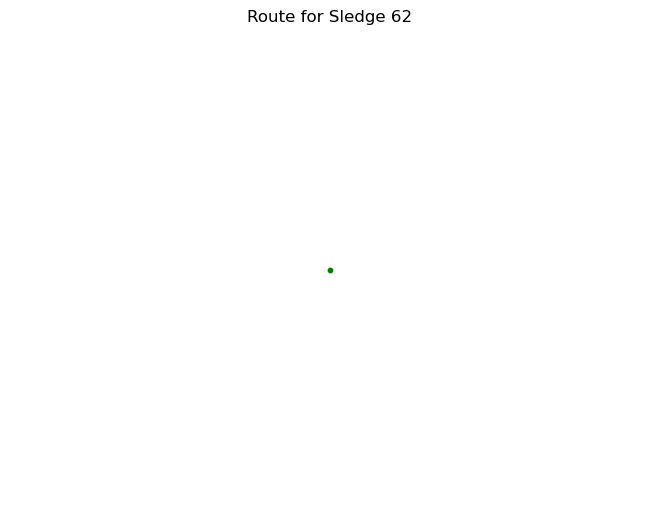

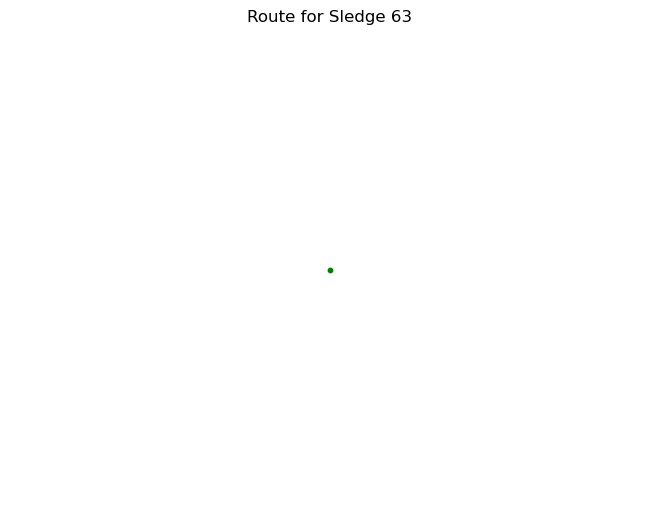

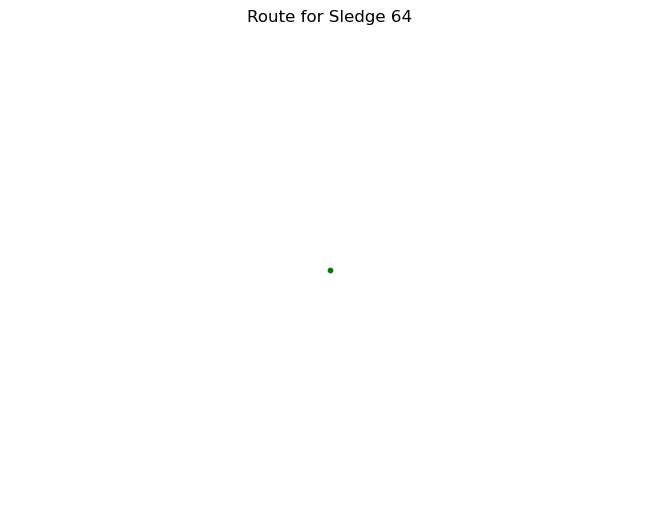

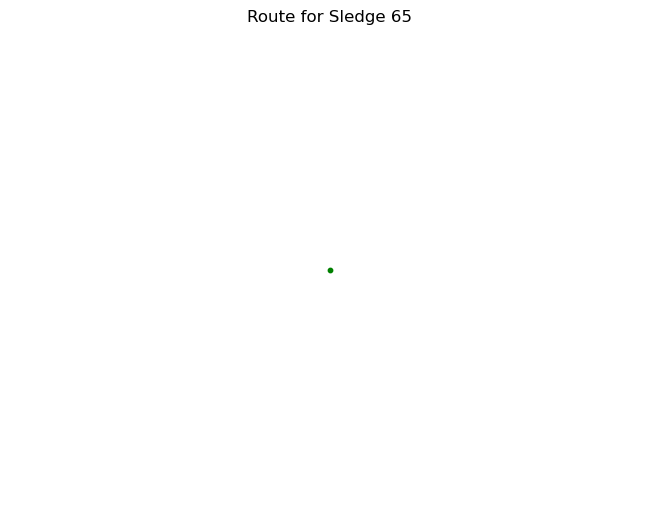

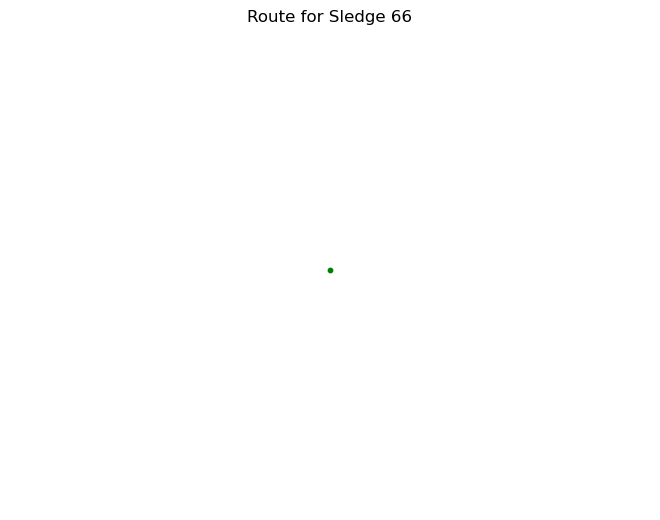

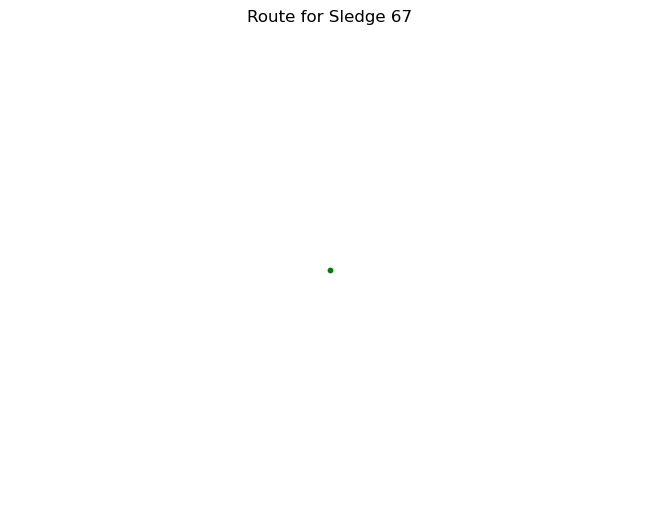

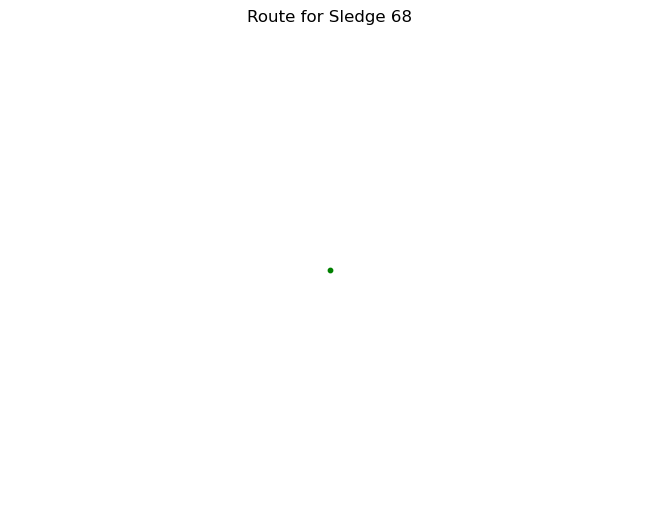

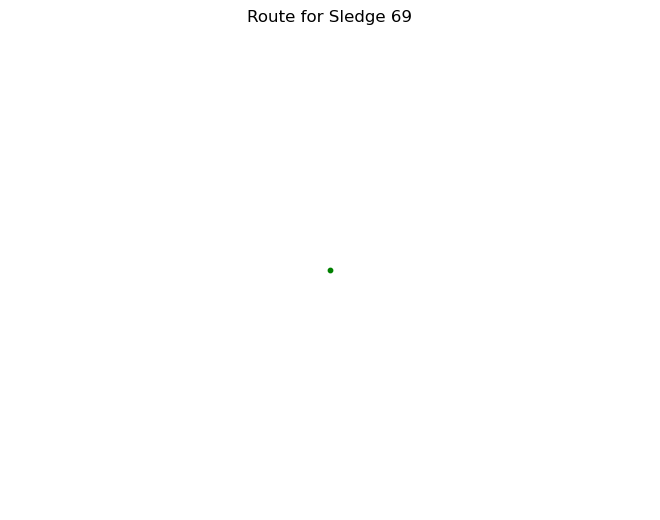

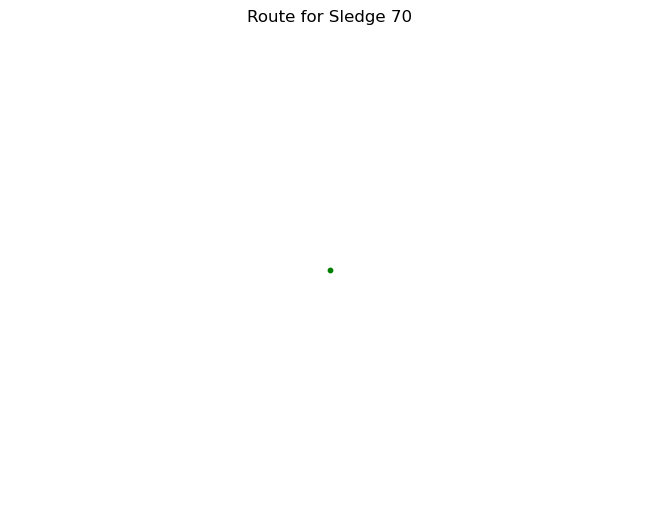

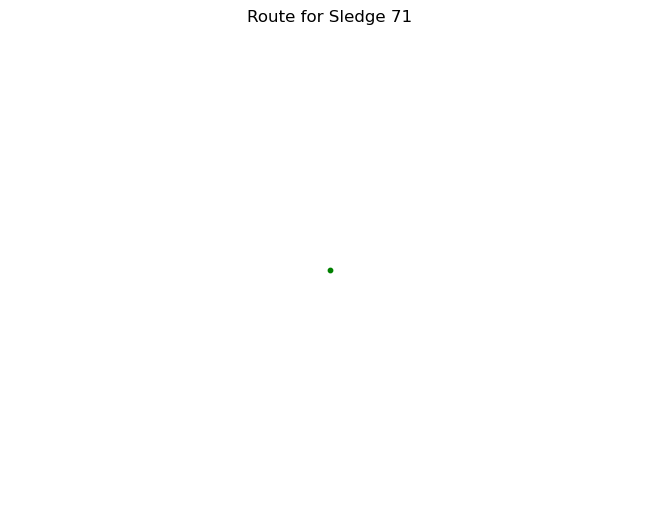

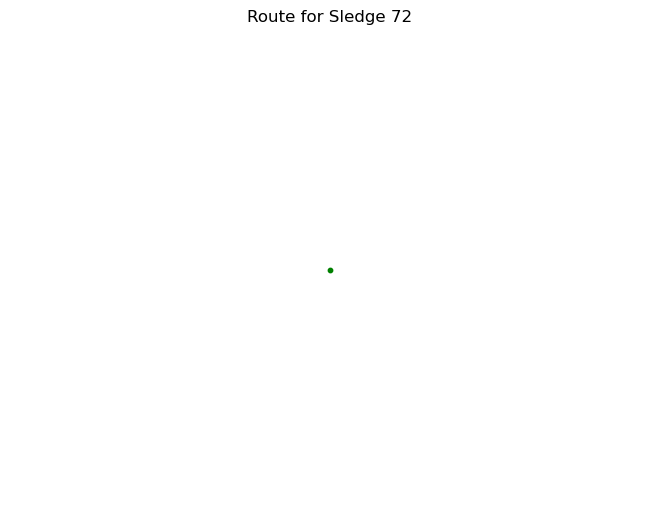

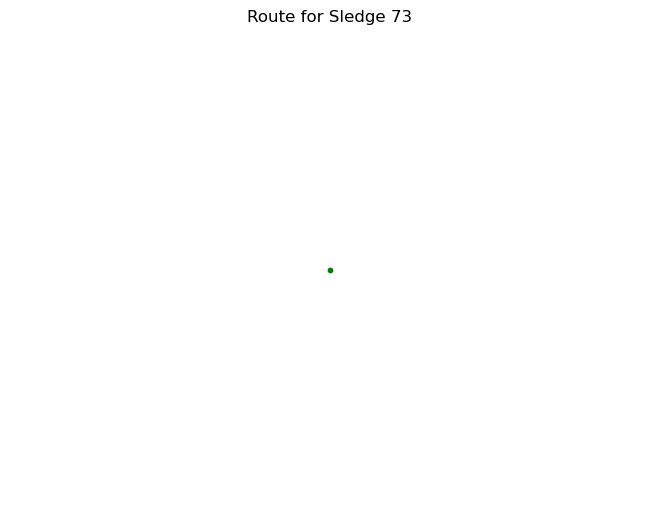

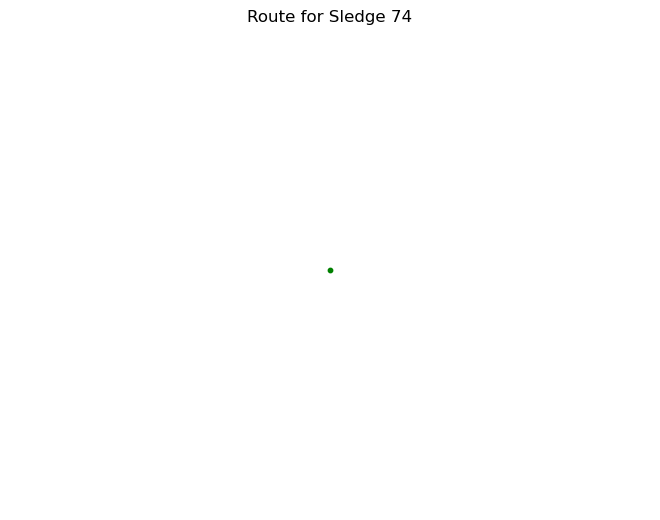

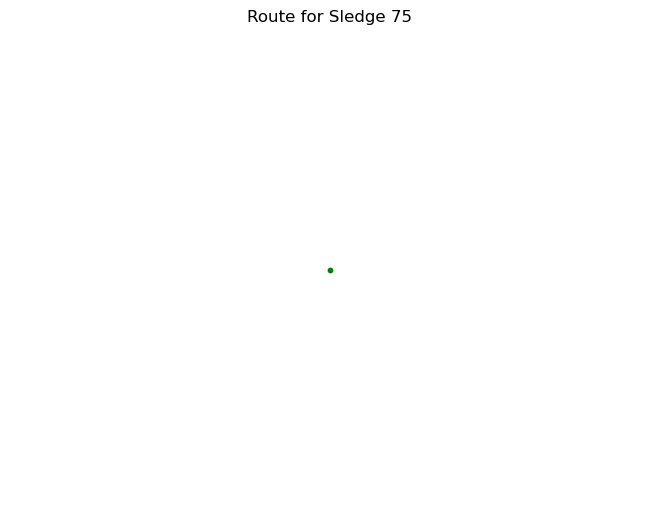

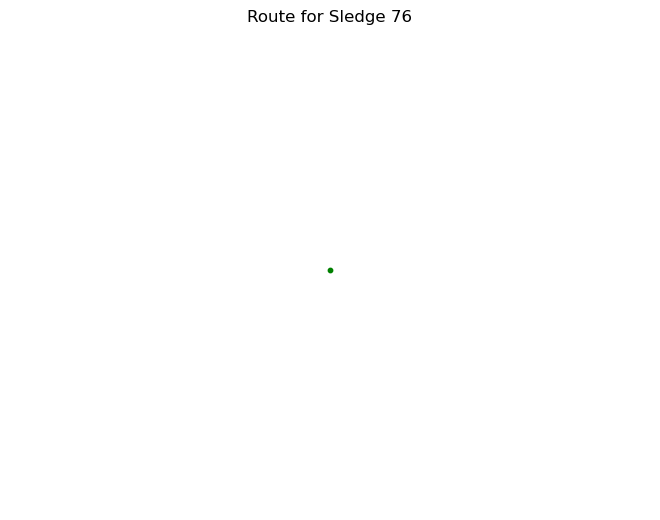

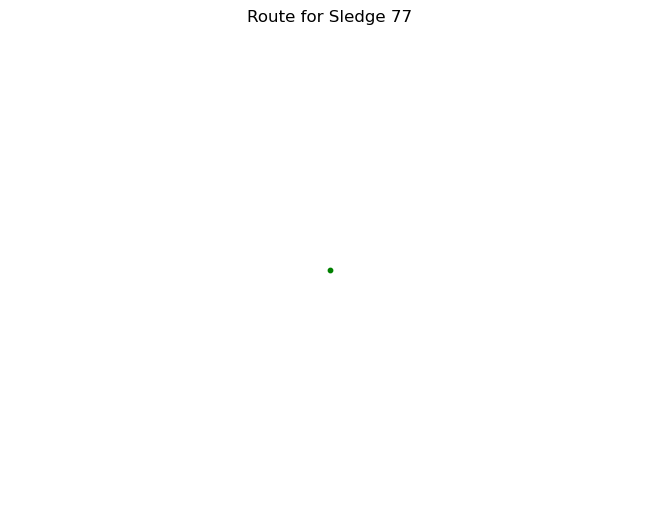

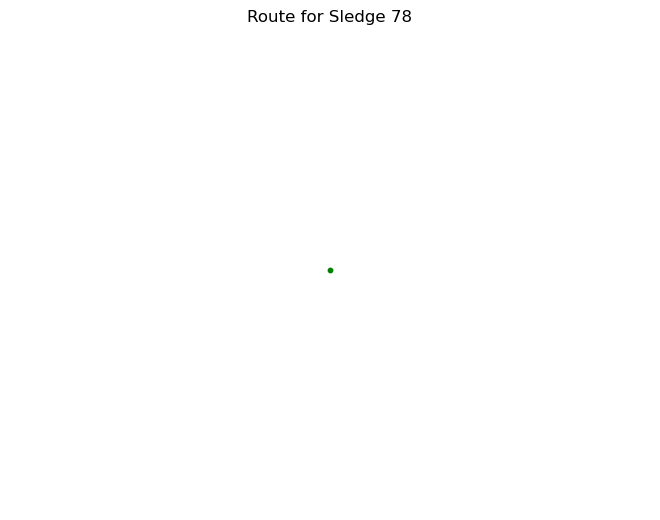

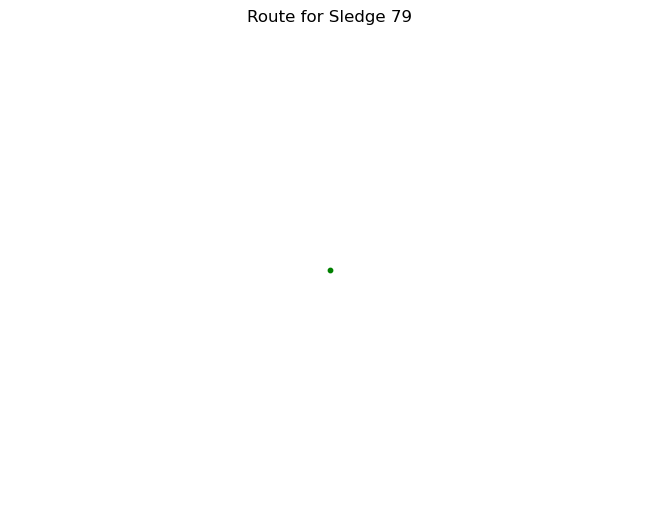

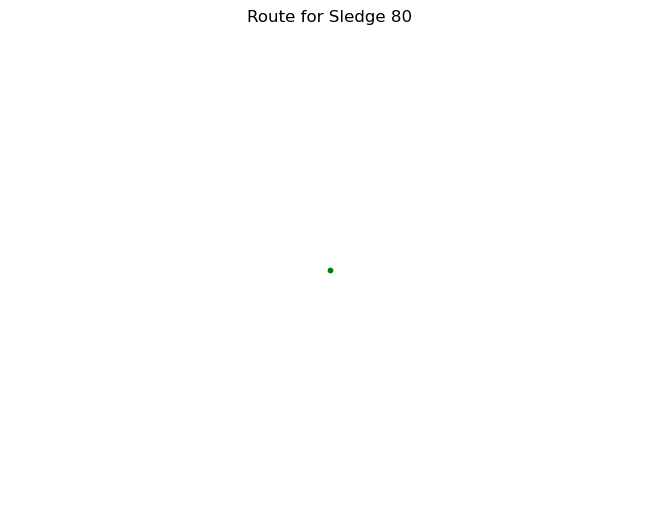

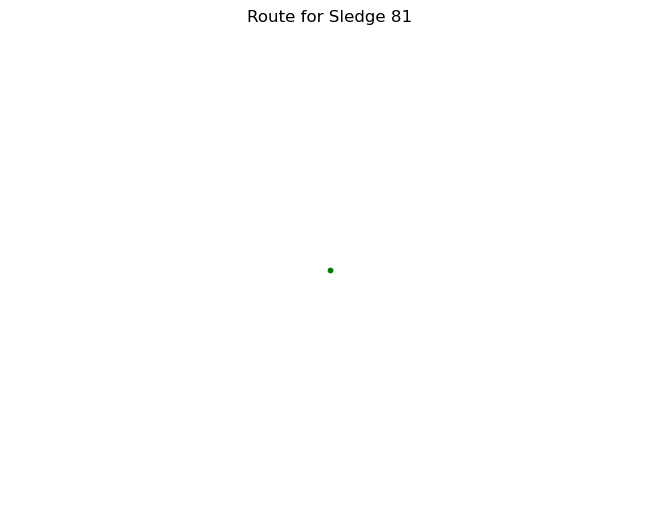

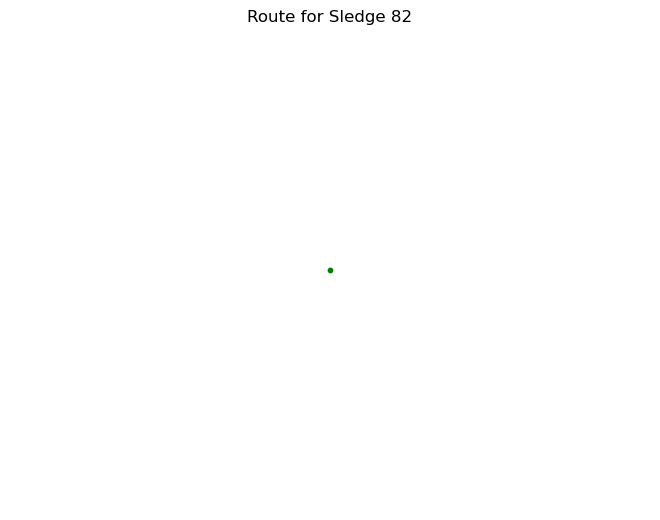

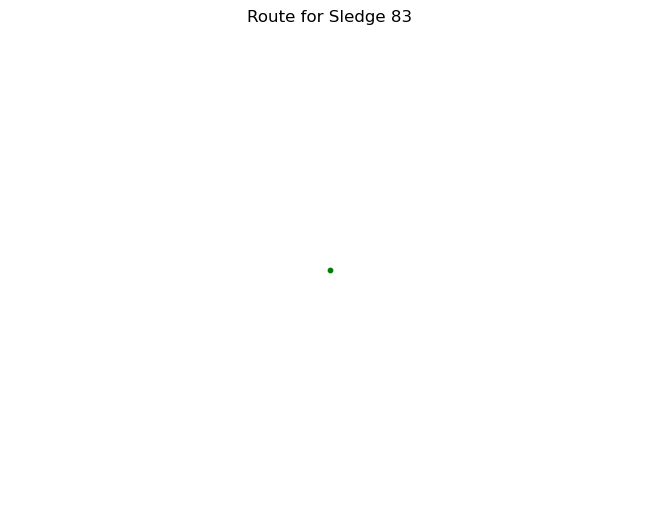

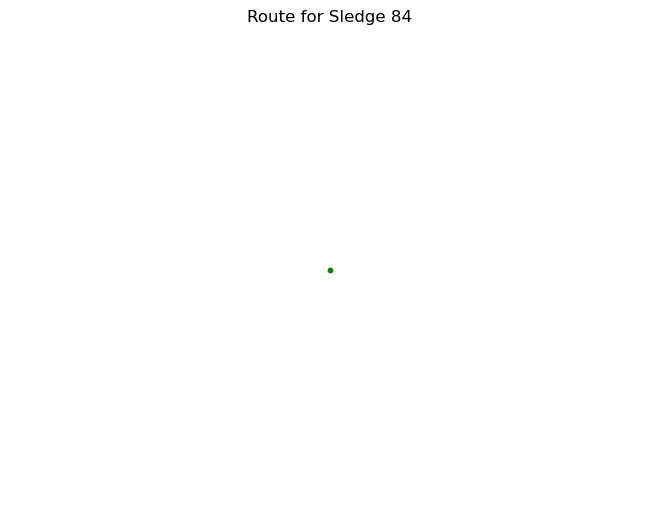

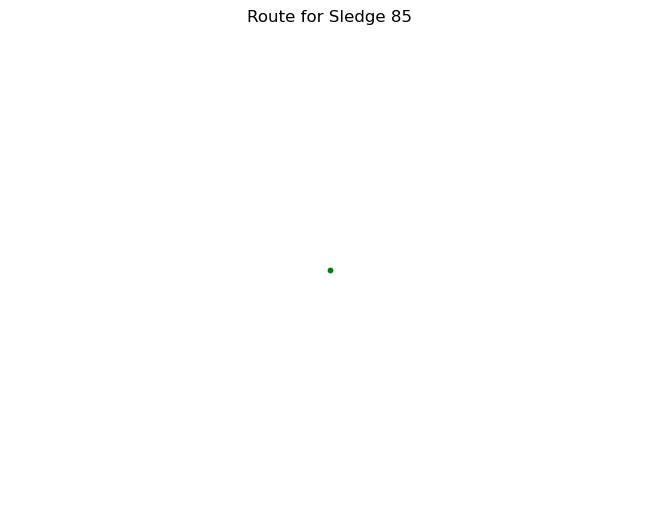

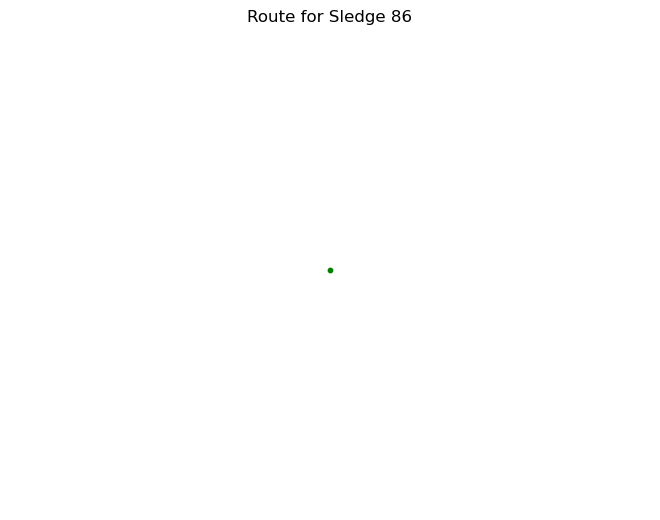

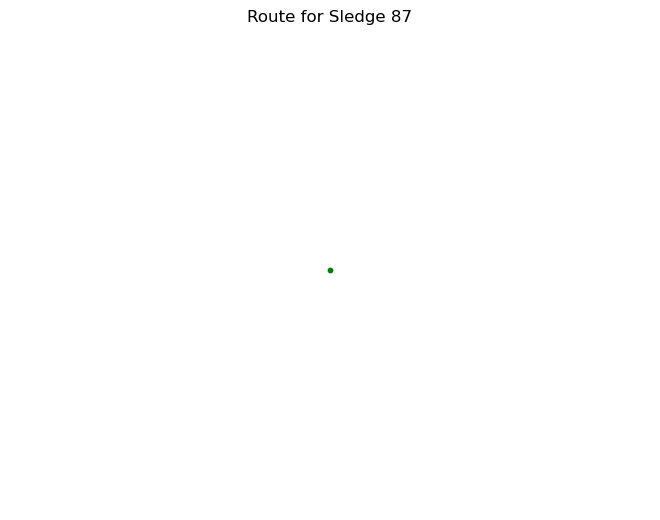

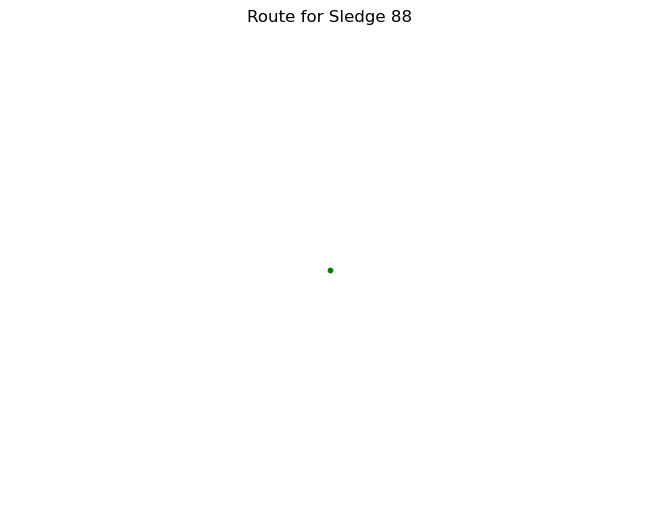

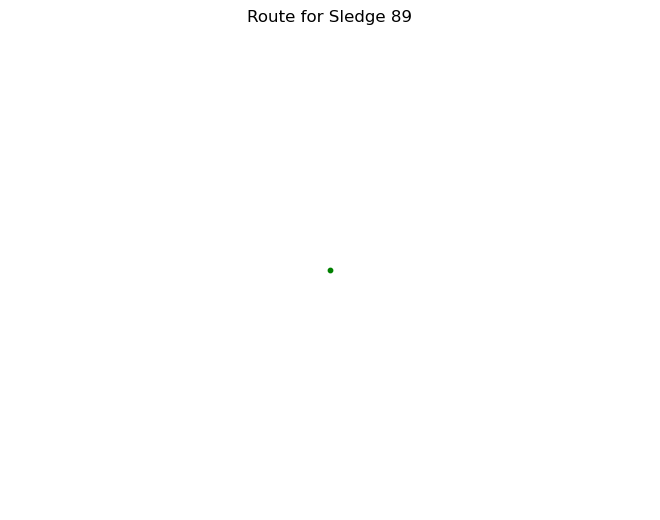

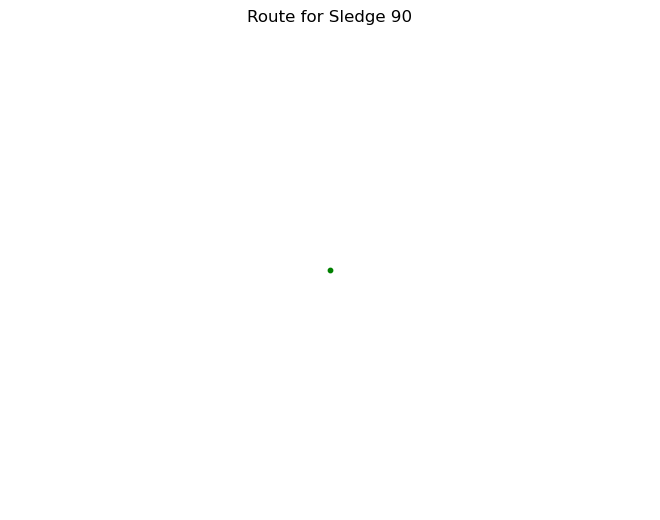

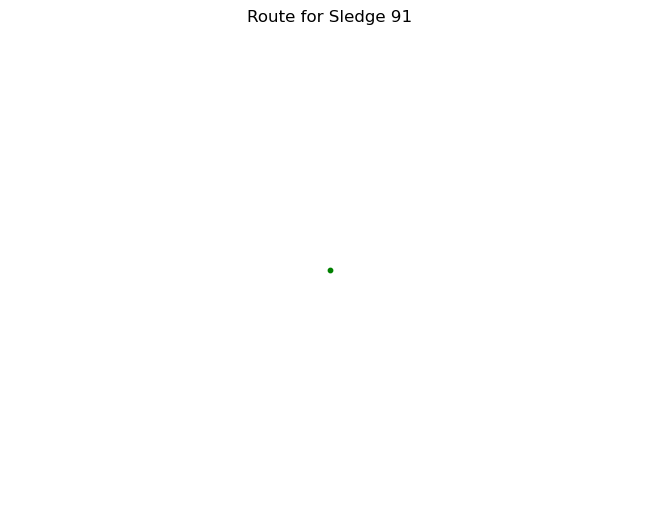

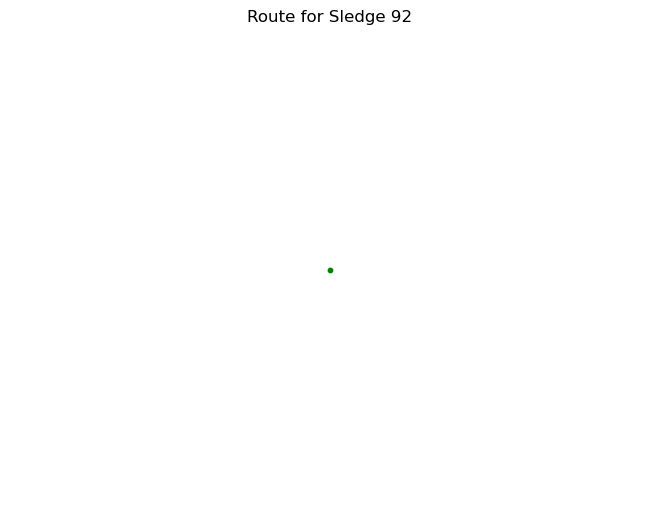

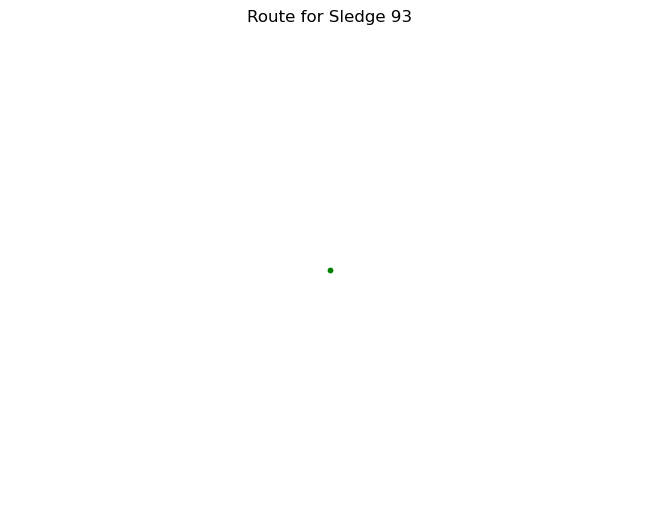

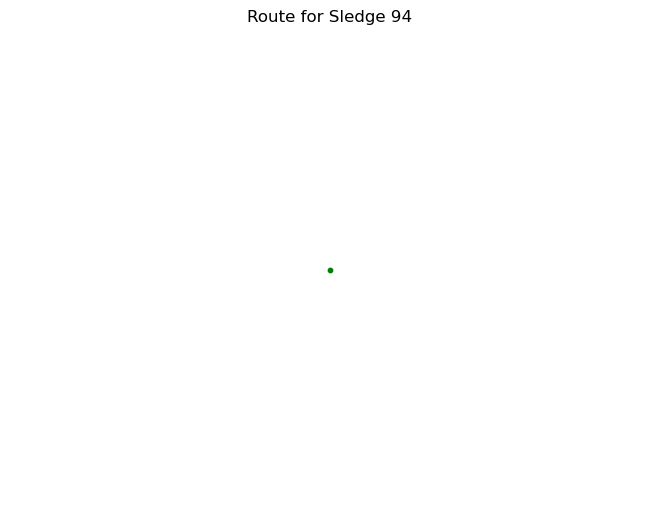

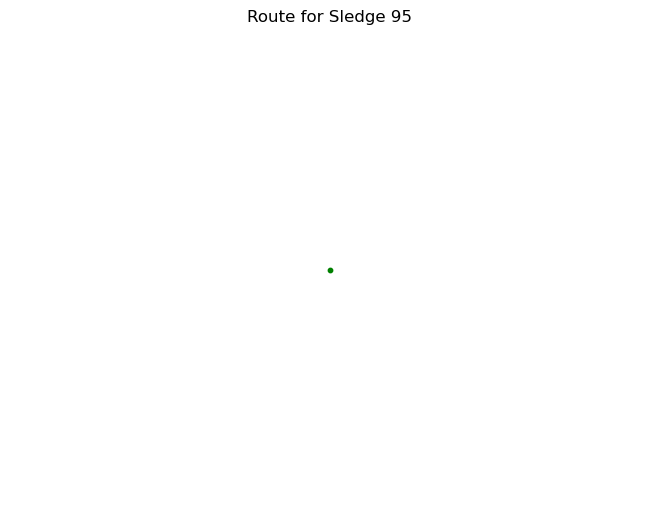

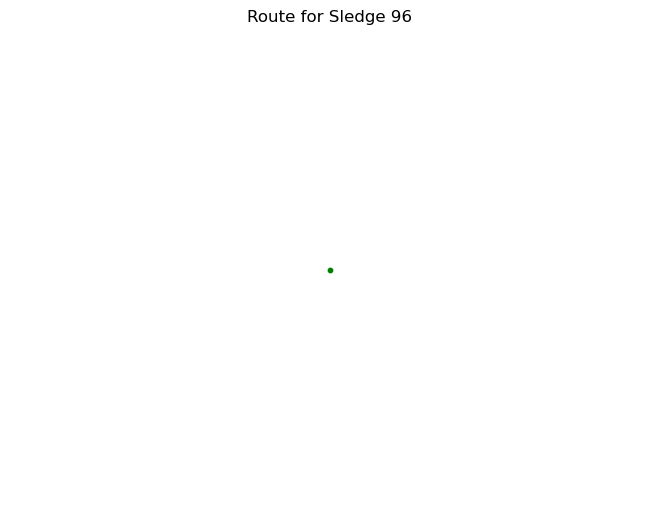

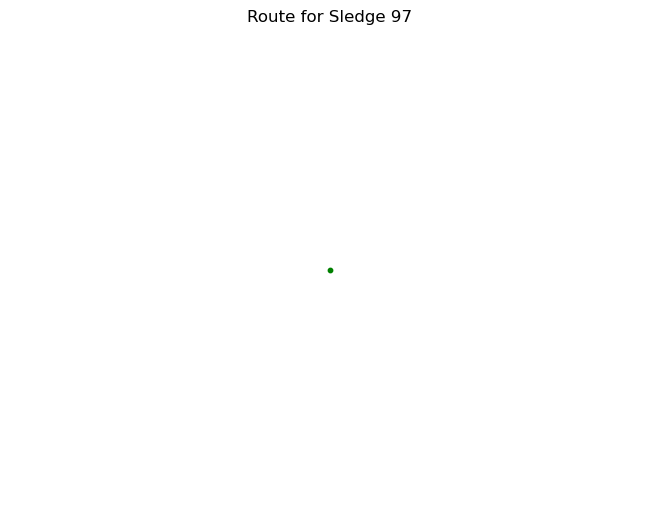

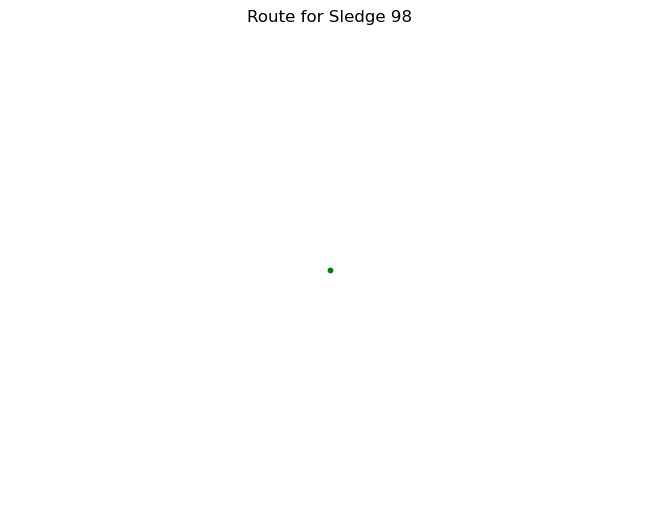

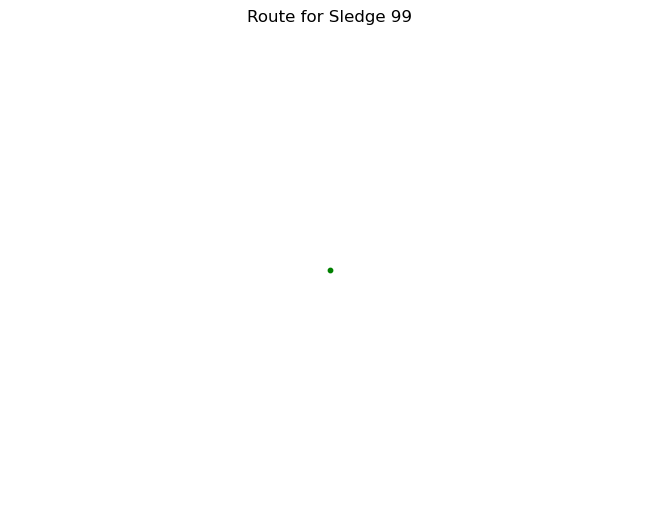

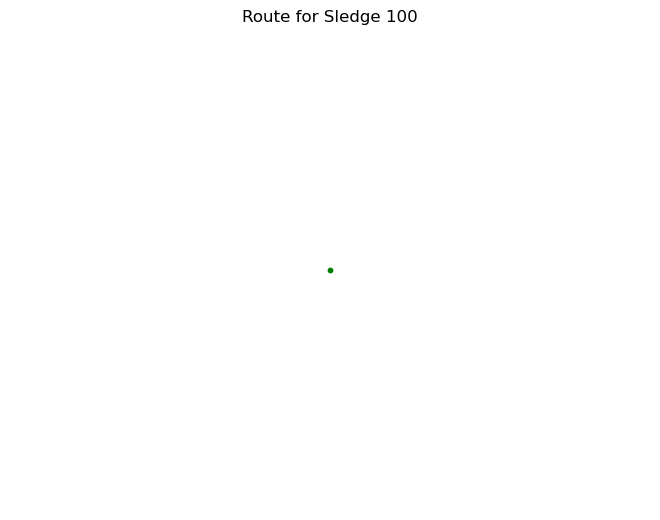

In [52]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# ... [Include your Present and Sledge class definitions here] ...

# ... [Include your nearest_neighbor_route function here] ...

def plot_sledge_route(sledge, sledge_number):
    G = nx.DiGraph()
    node_positions = {}  # Dictionary to hold node positions
    prev_point = (0, 0)  # Assuming the sledge starts at (0, 0)
    node_colors = ["green"]  # Starting node color
    G.add_node((0,0))
    node_positions[(0, 0)] = (0, 0)


    for present in sledge.pres_deliv:
        start_point = (present.starthor, present.startver)
        finish_point = (present.finhor, present.finver)

        # Add edges and nodes to the graph
        G.add_node(start_point, color='blue')  # Starting point of the delivery
        G.add_node(finish_point, color='red')  # Ending point of the delivery
        G.add_edge(prev_point, start_point)
        G.add_edge(start_point, finish_point)

        # Assign node positions
        node_positions[start_point] = start_point
        node_positions[finish_point] = finish_point

        # Update the previous point and node colors
        prev_point = finish_point
        node_colors.append('blue')
        node_colors.append('red')

    # Plot the graph
    nx.draw(G, pos=node_positions, node_color=node_colors, with_labels=False, node_size=10, arrows=True)
    plt.title(f"Route for Sledge {sledge_number}")
    plt.show()

# Example usage
# Read the rest of the file into a DataFrame
# df = ...

# Create sledges
# sledges = ...

# Run the nearest neighbor algorithm
# nearest_neighbor_route(df, sledges)

# Plot the routes for each sledge
for i, sledge in enumerate(sledges):
    plot_sledge_route(sledge, i + 1)
